# Lead Sharing Case Study

### Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
#Set the option to only display up to 500 rows and 100 columns.
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_rows", 500)

## Data Analysis: Examine & Visualise the Leads Data Set's Features


In [3]:
#importing Data frame
sarat_df =  pd.read_csv("Leads.csv")

In [4]:
## Calculate the data's  row and column counts
sarat_df.shape

(9240, 37)

In [5]:
#Get information per column, including datatypes and missing values.
sarat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Get the numeric values' distribution in this code.
sarat_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# use df.head() to check the sample values.
sarat_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# Null % values
leads_null_fields=round((sarat_df.isna().sum())/len(sarat_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


In [9]:
# deleting the column Lead Number because it already has a unique value.
sarat_df = sarat_df.drop('Prospect ID', axis=1)

In [10]:
# Examining unique values
for x in sarat_df.columns:
    print(x+':',len(sarat_df[x].unique()))

Lead Number: 9240
Lead Origin: 5
Lead Source: 22
Do Not Email: 2
Do Not Call: 2
Converted: 2
TotalVisits: 42
Total Time Spent on Website: 1731
Page Views Per Visit: 115
Last Activity: 18
Country: 39
Specialization: 20
How did you hear about X Education: 11
What is your current occupation: 7
What matters most to you in choosing a course: 4
Search: 2
Magazine: 1
Newspaper Article: 2
X Education Forums: 2
Newspaper: 2
Digital Advertisement: 2
Through Recommendations: 2
Receive More Updates About Our Courses: 1
Tags: 27
Lead Quality: 6
Update me on Supply Chain Content: 1
Get updates on DM Content: 1
Lead Profile: 7
City: 8
Asymmetrique Activity Index: 4
Asymmetrique Profile Index: 4
Asymmetrique Activity Score: 13
Asymmetrique Profile Score: 11
I agree to pay the amount through cheque: 1
A free copy of Mastering The Interview: 2
Last Notable Activity: 16


In [11]:
sarat_df.shape

(9240, 36)

In [12]:
# the model is improved by deleting the five columns that are consistent across all rows.
sarat_df = sarat_df.drop('Magazine', axis=1)
sarat_df = sarat_df.drop('Receive More Updates About Our Courses', axis=1)
sarat_df = sarat_df.drop('Update me on Supply Chain Content', axis=1)
sarat_df = sarat_df.drop('Get updates on DM Content', axis=1)
sarat_df = sarat_df.drop('I agree to pay the amount through cheque', axis=1)

In [13]:
sarat_df.shape

(9240, 31)

In [14]:
# The rows for which the count of Null fields is greater than 1/3rd ( > 10) are to be removed 
# and rows with <= 1/3rd (<=10) are retained

sarat_df = sarat_df[sarat_df.isnull().sum(axis=1) <= 10]
sarat_df.shape

(8576, 31)

# Performing EDA

Univariate Analysis ---> Categorical variables

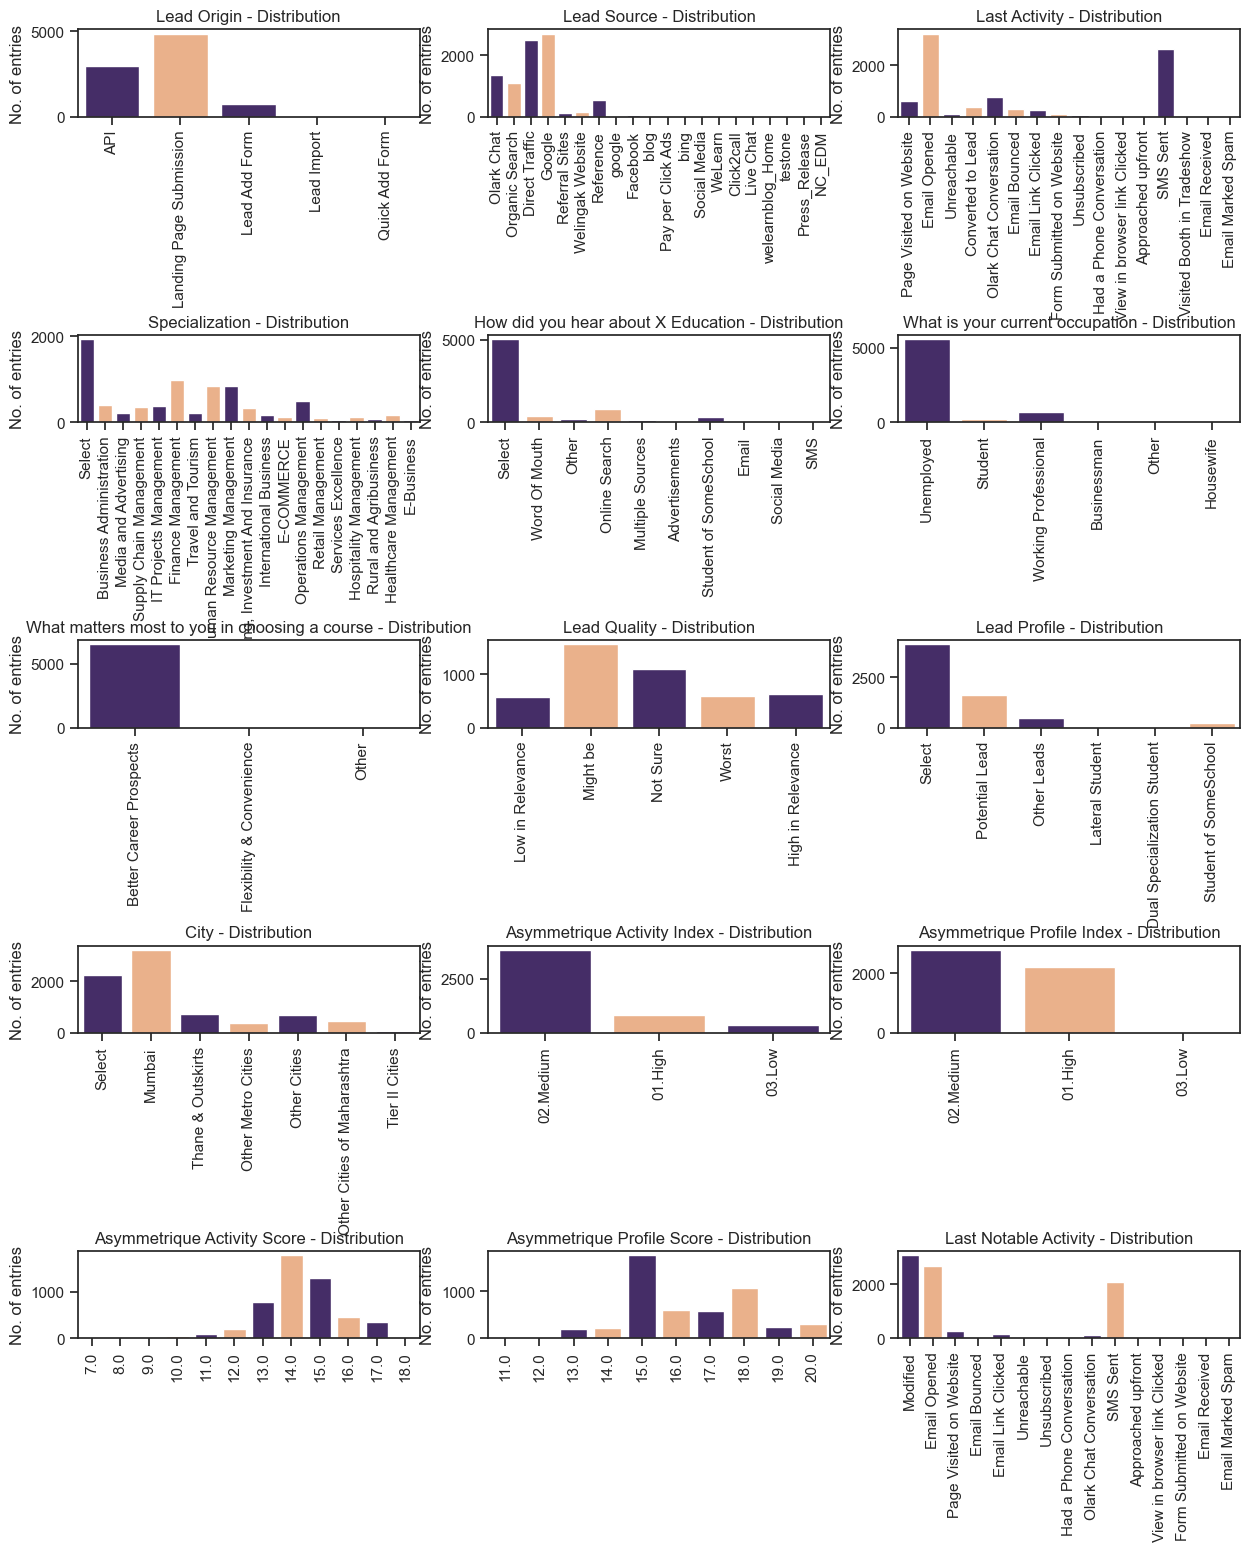

In [15]:
# To obtain a sense of how the values are distributed, check the distribution of categorical variables.
col_list_for_count=['Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education',
                    'What is your current occupation','What matters most to you in choosing a course','Lead Quality',
                    'Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index',
                    'Asymmetrique Activity Score','Asymmetrique Profile Score','Last Notable Activity']
sns.set(style='ticks')

# Displaying the distribution of all category variables' histograms
plt.figure(figsize=(15,17))
for i in range(len(col_list_for_count)):
    plt.subplot(5, 3, i+1)
    var=col_list_for_count[i]
    sns.countplot(x=var, data=sarat_df, palette=['#432371',"#FAAE7B"])
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 2.5)

##### We can see from the above-mentioned Univariate Analysis of Categorical Variables that some of the fields contain the value "Select". This drop-down value was largely left in its current state, which is equivalent to Data Not available. For all practical purposes, we can treat it as NaN.

In [16]:
# Give the column values marked as Select the value np.NaN.
sel_var_list = ['Specialization','How did you hear about X Education','Lead Profile','City']

# After replacing with np.NaN, make sure all remaining fields have Unique values with counts.
for x in sel_var_list:
    sarat_df[x].replace('Select',np.NaN,inplace=True)

In [17]:
# Verify the percentages of null columns. and begin dealing with NULL values

leads_null_fields=round((sarat_df.isna().sum())/len(sarat_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.41
TotalVisits                                       1.57
Page Views Per Visit                              1.57
Last Activity                                     1.19
Country                                          23.85
Specialization                                   31.79
How did you hear about X Education               76.80
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     72.19
City                                             35.13
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
Asymmetrique Activity Score                      41.45
Asymmetrique Profile Score                       41.45
dtype: float64


### Bivariate Analysis --> Categorical variables

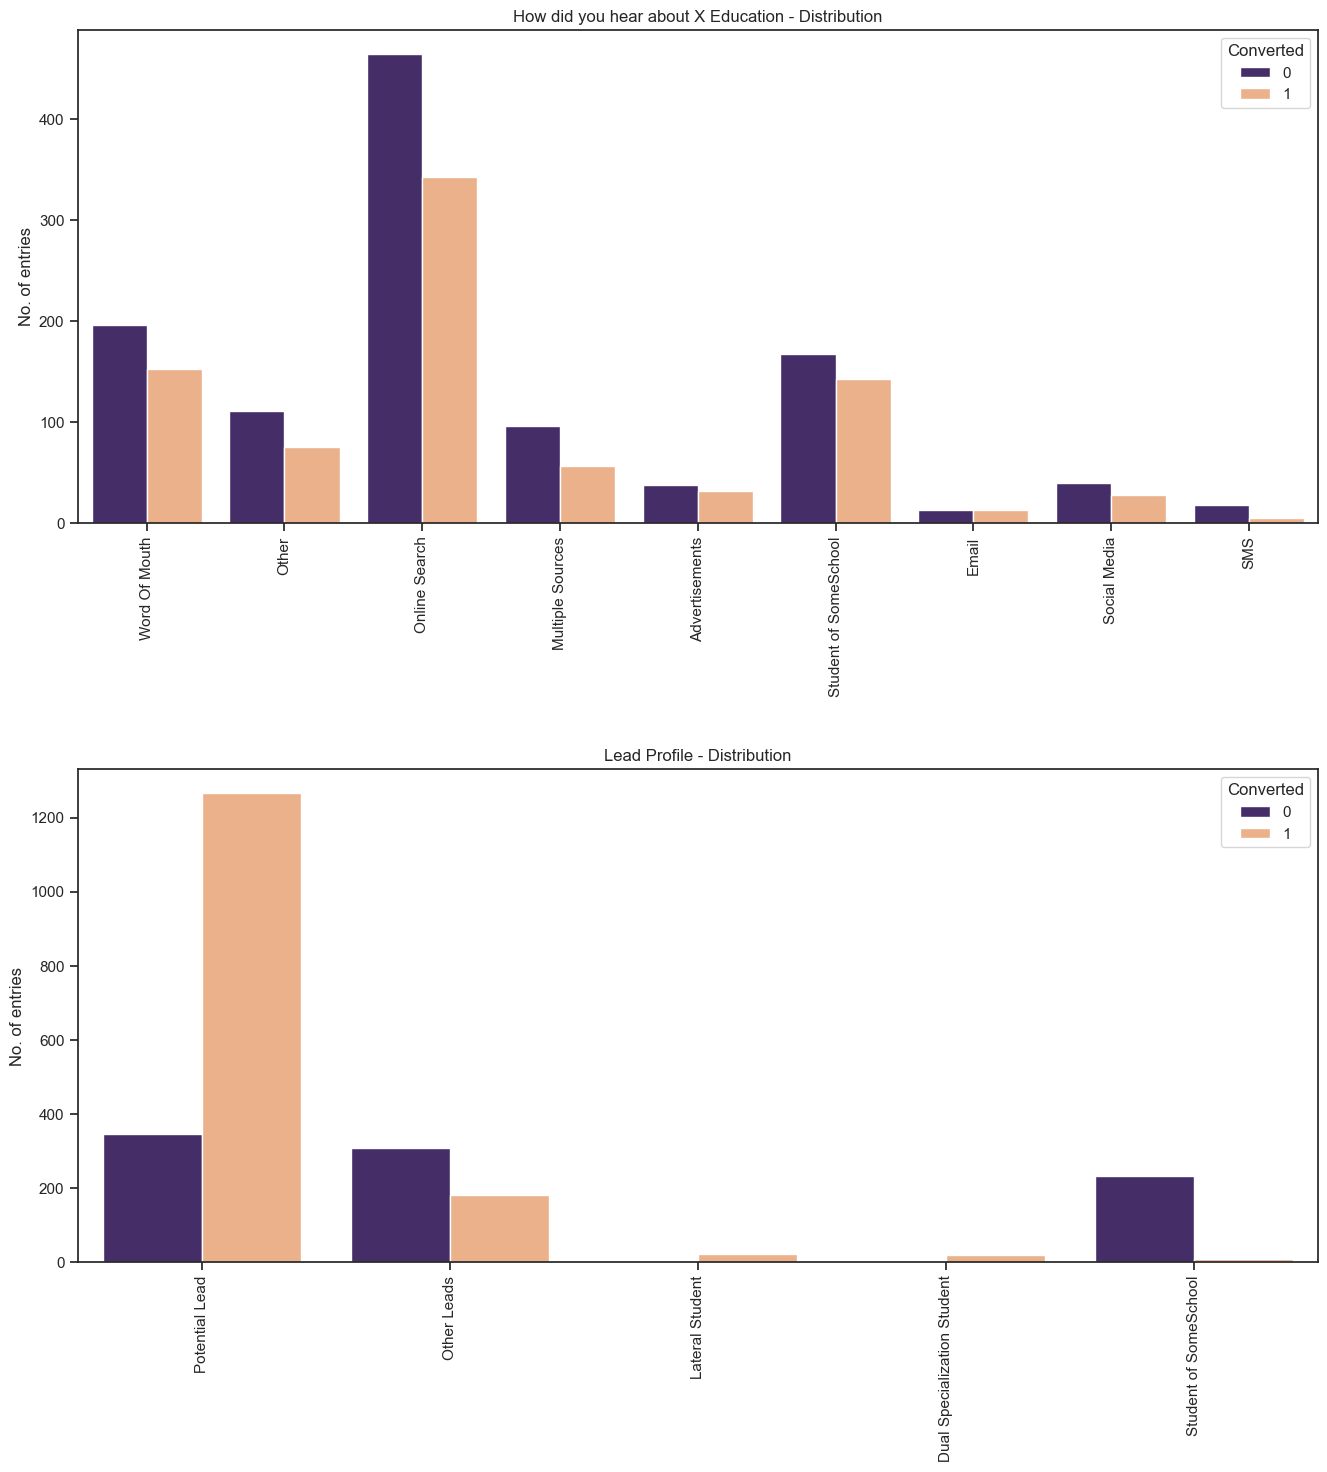

In [18]:
# Verify the variables that have a lot of NULL values.
column_list_count1=['How did you hear about X Education','Lead Profile']
sns.set(style="ticks")

# Displaying the distribution of these two category variables' histograms
plt.figure(figsize=(16,16))
for i in range(len(column_list_count1)):
    plt.subplot(2, 1, i+1)
    var=column_list_count1[i]
    #sns.countplot(leads_df[var])
    sns.countplot(x= var, hue = 'Converted', data = sarat_df , palette=['#432371',"#FAAE7B"] )
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

In [19]:
# Remove from the model any columns with more than 50% NULL values.

# Remove the "How did you hear about X Education" field because it contains a large percentage of NULL entries and makes little inferences.
sarat_df=sarat_df.drop('How did you hear about X Education',axis=1)

In [20]:
# Verify the Asymmetric Index and Score values.
print(sarat_df['Asymmetrique Activity Index'].value_counts())
print(sarat_df['Asymmetrique Activity Score'].value_counts())
print(sarat_df['Asymmetrique Profile Index'].value_counts())
print(sarat_df['Asymmetrique Profile Score'].value_counts())

02.Medium    3839
01.High       820
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     348
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64
02.Medium    2787
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64
15.0    1758
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64


### Delete the values from the asymmetrical columns.

In [21]:
## Adjust the values in the asymmetrical columns.
assymetrique_list = ['Asymmetrique Activity Index','Asymmetrique Profile Index']
sarat_df[assymetrique_list] = sarat_df[assymetrique_list].apply(lambda x: x.map({'01.High':'High','02.Medium':'Medium','03.Low':'Low'}))

print(sarat_df['Asymmetrique Activity Index'].value_counts())
print(sarat_df['Asymmetrique Profile Index'].value_counts())

Medium    3839
High       820
Low        362
Name: Asymmetrique Activity Index, dtype: int64
Medium    2787
High      2203
Low         31
Name: Asymmetrique Profile Index, dtype: int64


The Asymmetrique Index columns are already used to group the Assymetrique Scores. Thus, we may discard the scores.

In [22]:
# Remove the Asymmetrique columns with score values since Index columns already describe them.

sarat_df=sarat_df.drop('Asymmetrique Activity Score',axis=1)
sarat_df=sarat_df.drop('Asymmetrique Profile Score',axis=1)

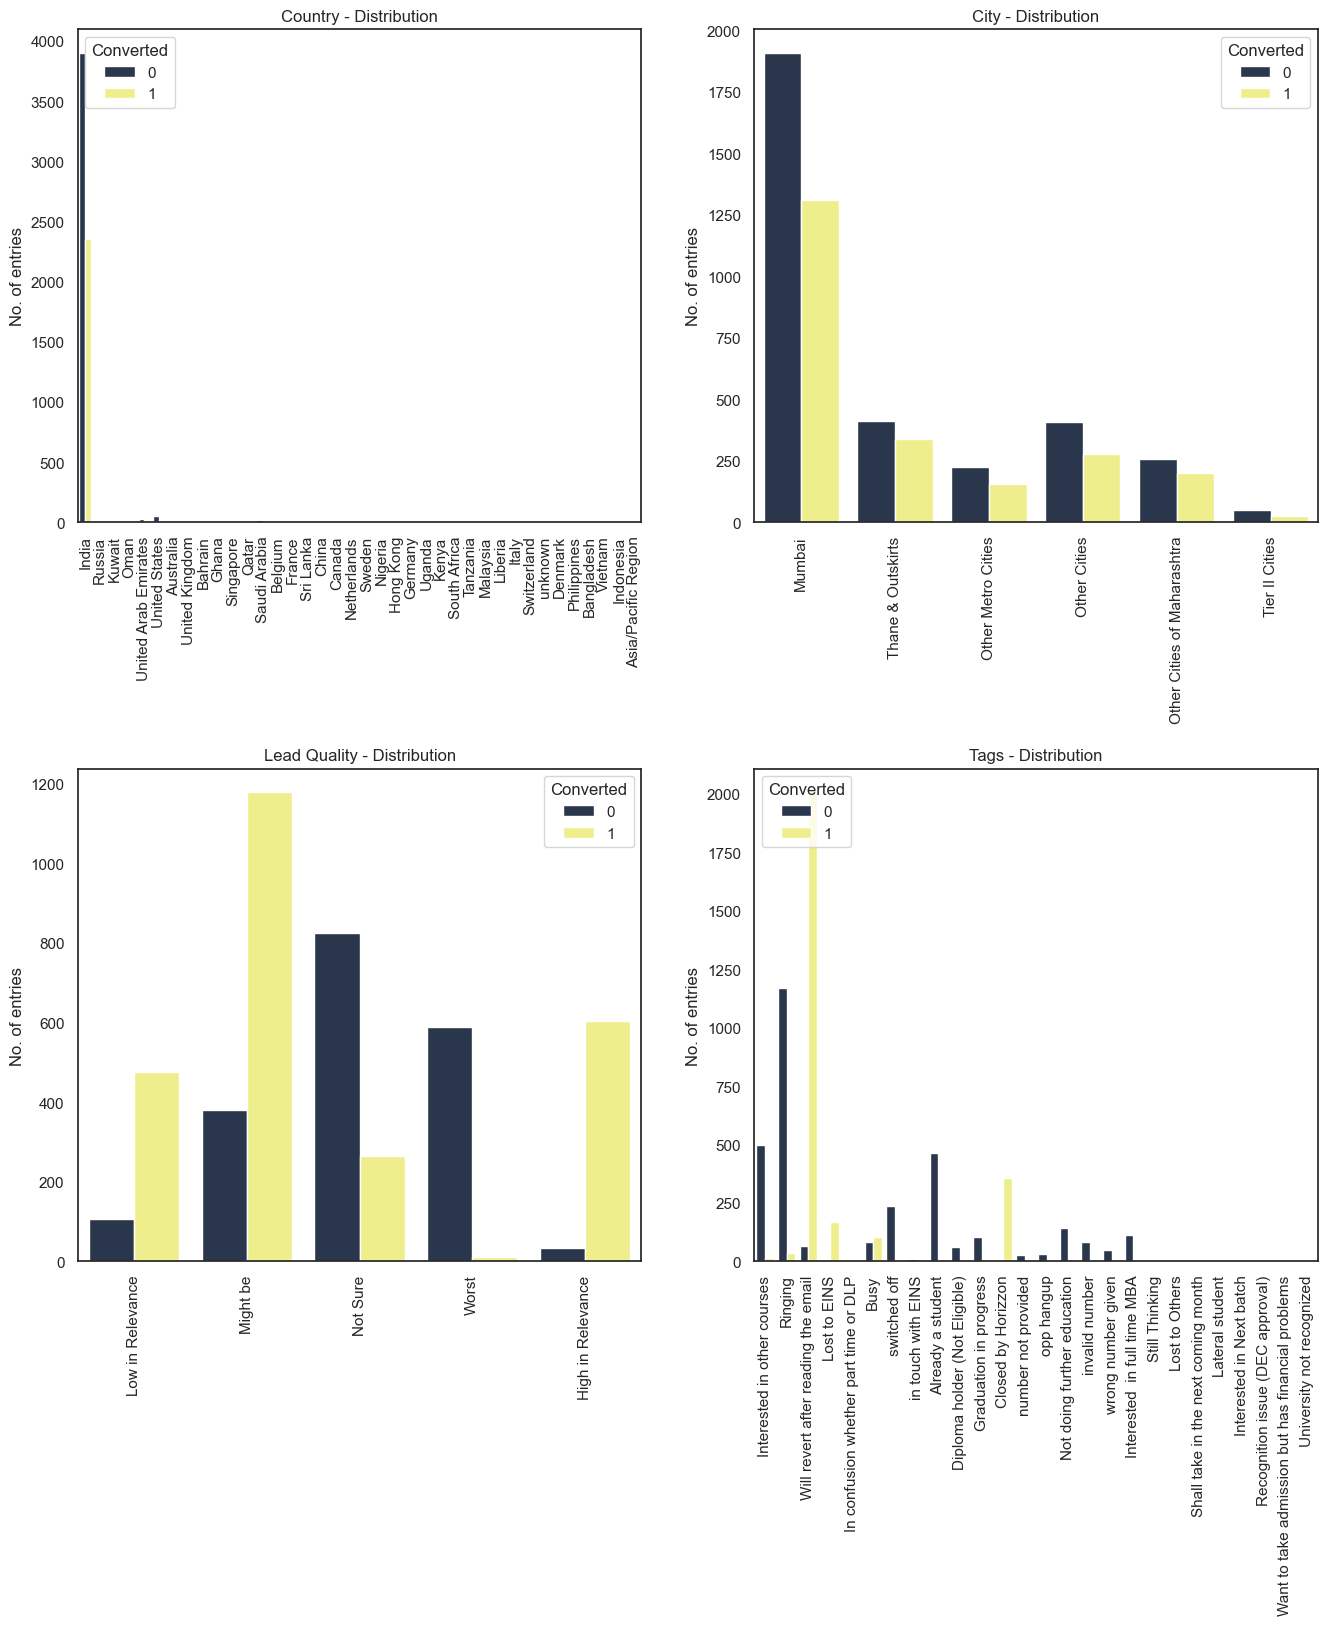

In [23]:
column_list_count2=['Country','City','Lead Quality','Tags']
sns.set(style="white")

# Displaying the distribution of all category variables' histograms
plt.figure(figsize=(16,16))
for i in range(len(column_list_count2)):
    plt.subplot(2, 2, i+1)
    var=column_list_count2[i]
    sns.countplot(x= var, hue = 'Converted', data = sarat_df ,  palette=['#233551',"#FFFE7B"])
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

Locations include a country and city.

1. Of the 39 country values, 23% are null.
2. Eight different city values, of which 35% are zero
3. It is evident from the count plots above that neither the country nor the city significantly affect conversion rates.

Therefore, removing both fields

In [24]:
# Eliminating the two location fields

sarat_df=sarat_df.drop('Country',axis=1)
sarat_df=sarat_df.drop('City',axis=1)

In [25]:
# Verify the percentages of null columns.

lead_nullfields_value=round((sarat_df.isna().sum())/len(sarat_df.index) * 100,2)
print(lead_nullfields_value[lead_nullfields_value > 0])

Lead Source                                       0.41
TotalVisits                                       1.57
Page Views Per Visit                              1.57
Last Activity                                     1.19
Specialization                                   31.79
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     72.19
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
dtype: float64


In [26]:
# Check the description of any numeric fields that contain NULL values.
sarat_df[['TotalVisits','Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,8441.000000,8441.000000
mean,3.603720,2.475223
std,4.954932,2.156764
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.500000
max,251.000000,55.000000


In [27]:
# Check the description of any numerical fields that have NULL values.
sarat_df.loc[sarat_df['TotalVisits'] == 3]['Page Views Per Visit'].describe()

count    1248.000000
mean        2.654247
std         0.648270
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Page Views Per Visit, dtype: float64

In [28]:
# Use median to impute the NULLs in "TotalVisits"
sarat_df['TotalVisits'].fillna((sarat_df['TotalVisits'].median()), inplace=True)

# Calculate the "median value of TotalVisits" and use that value to impute the NULLs in "Page Views Per Visit"
sarat_df['Page Views Per Visit'].replace(np.NaN,2.65,inplace=True)

# Verify the other NULL fields.
lead_nullfields_value=round((sarat_df.isna().sum())/len(sarat_df.index) * 100,2)
print(lead_nullfields_value[lead_nullfields_value > 0])

Lead Source                                       0.41
Last Activity                                     1.19
Specialization                                   31.79
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     72.19
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
dtype: float64


In [29]:
# Impute with MODE for the categorical variables "Lead Scource" and "Last Activity" because there are extremely few NULL values.

sarat_df['Lead Source'].fillna((sarat_df['Lead Source'].mode()[0]), inplace=True)
sarat_df['Last Activity'].fillna((sarat_df['Last Activity'].mode()[0]), inplace=True)

In [30]:
# Assign the value np.NaN to the remaining two column values that are listed as Select
column_list_count1=['What is your current occupation','What matters most to you in choosing a course']

#After replacing with np.NaN, check the Unique values with counts in the remaining fields.
for x in column_list_count1:
    sarat_df[x].replace('Select',np.NaN,inplace=True)

Visualise these two variables

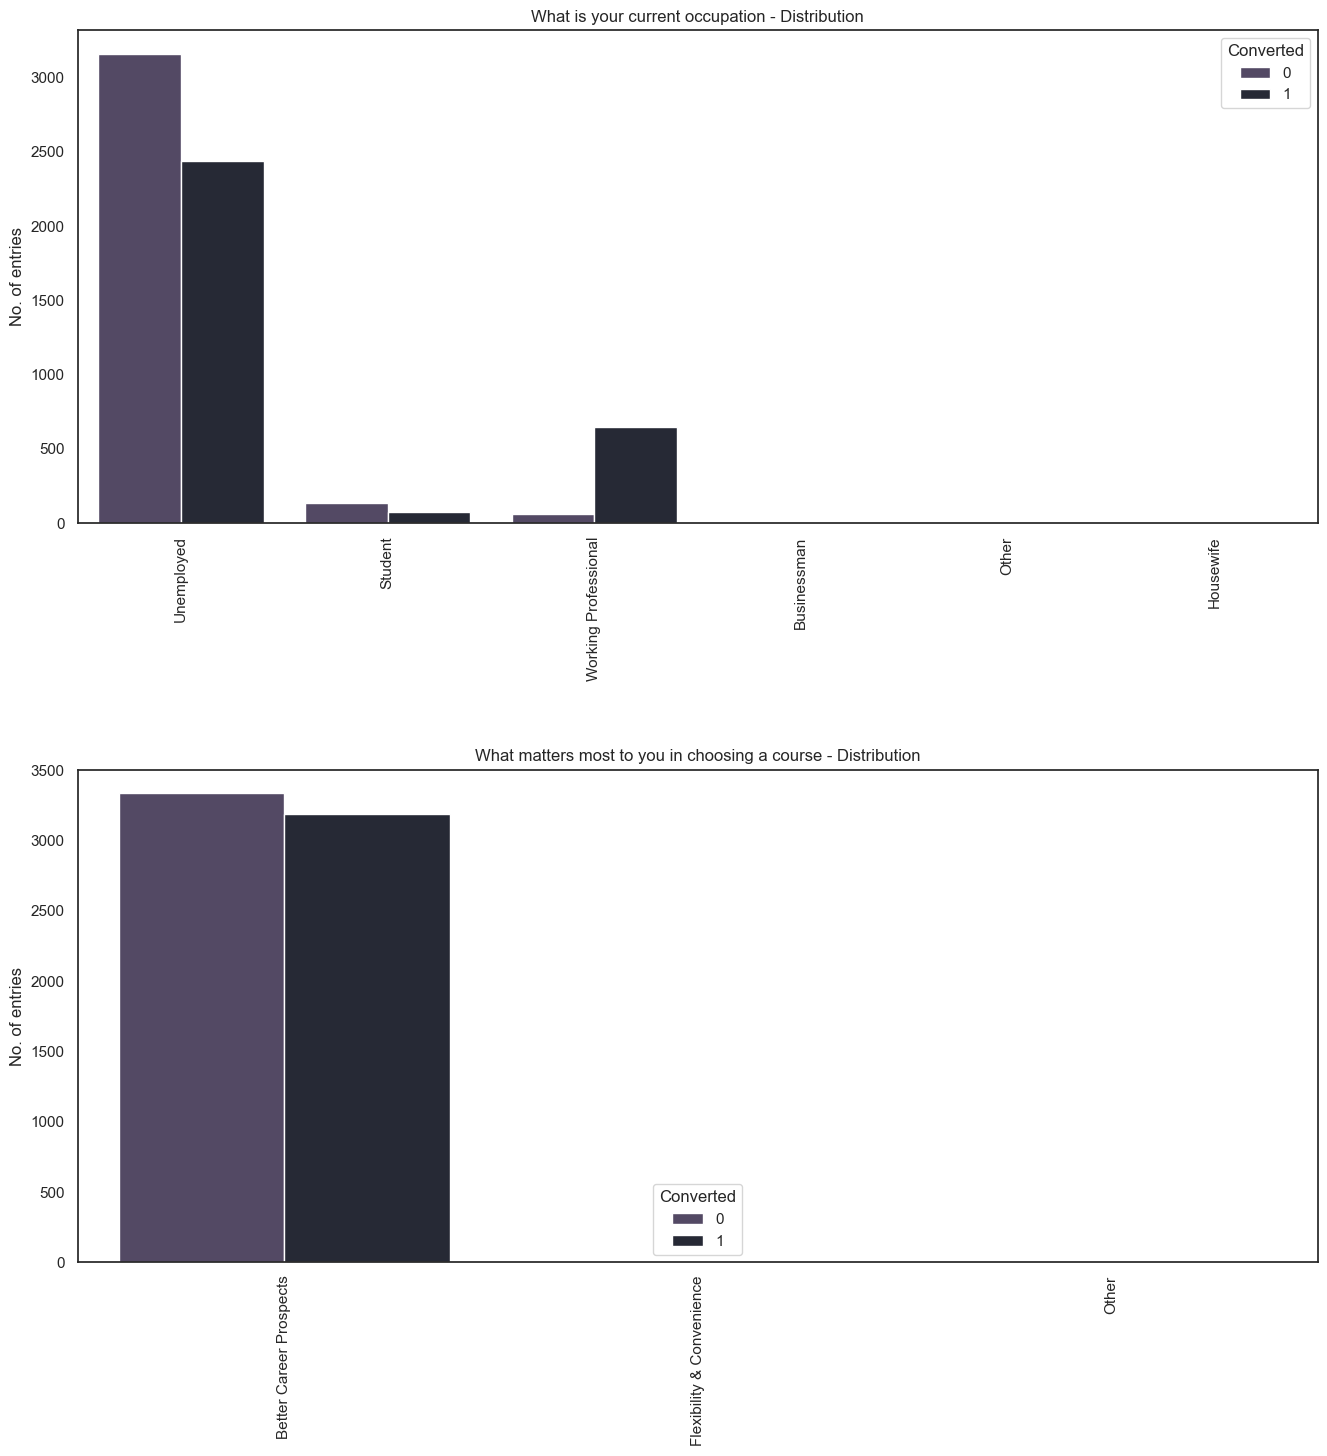

In [31]:
sns.set(style="white")

# displaying the distribution of all category variables' histograms
plt.figure(figsize=(16,16))
for i in range(len(column_list_count1)):
    plt.subplot(2, 1, i+1)
    var=column_list_count1[i]
    sns.countplot(x= var, hue = 'Converted', data = sarat_df, palette=['#524568',"#232737"])
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

What's most important to you in a course is: "Better Career Prospects" is the value that most people choose for this column. As 99.99% of the non-null values in the accessible data set have the same value of "Better Career Prospects," this column does not significantly add value. So, removing the column

In [32]:
# Delete the field.
sarat_df=sarat_df.drop('What matters most to you in choosing a course',axis=1)

In [33]:
# Replace the NaN values for occupation with Unknown since imputing any other value will lead to bias.

sarat_df['What is your current occupation'].fillna(('Unknown'), inplace=True)

Text(0.5, 0, '')

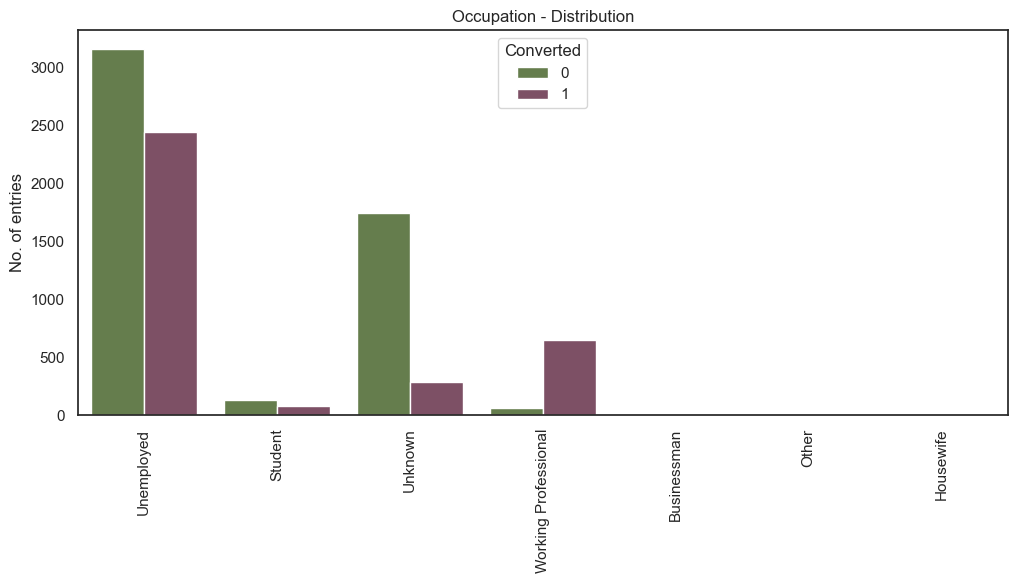

In [34]:
# displaying the distribution of occupation variables in a histogram
plt.figure(figsize=(12,5))
sns.countplot(x= 'What is your current occupation', hue = 'Converted', data = sarat_df, palette=['#658545',"#854865"])
plt.xticks(rotation=90)
plt.title('Plotting data for target in terms of total count')
plt.title('Occupation - Distribution')
plt.ylabel('No. of entries')
plt.xticks(rotation=90)
plt.xlabel(None)

Verify and begin purging the remaining categorical variables.

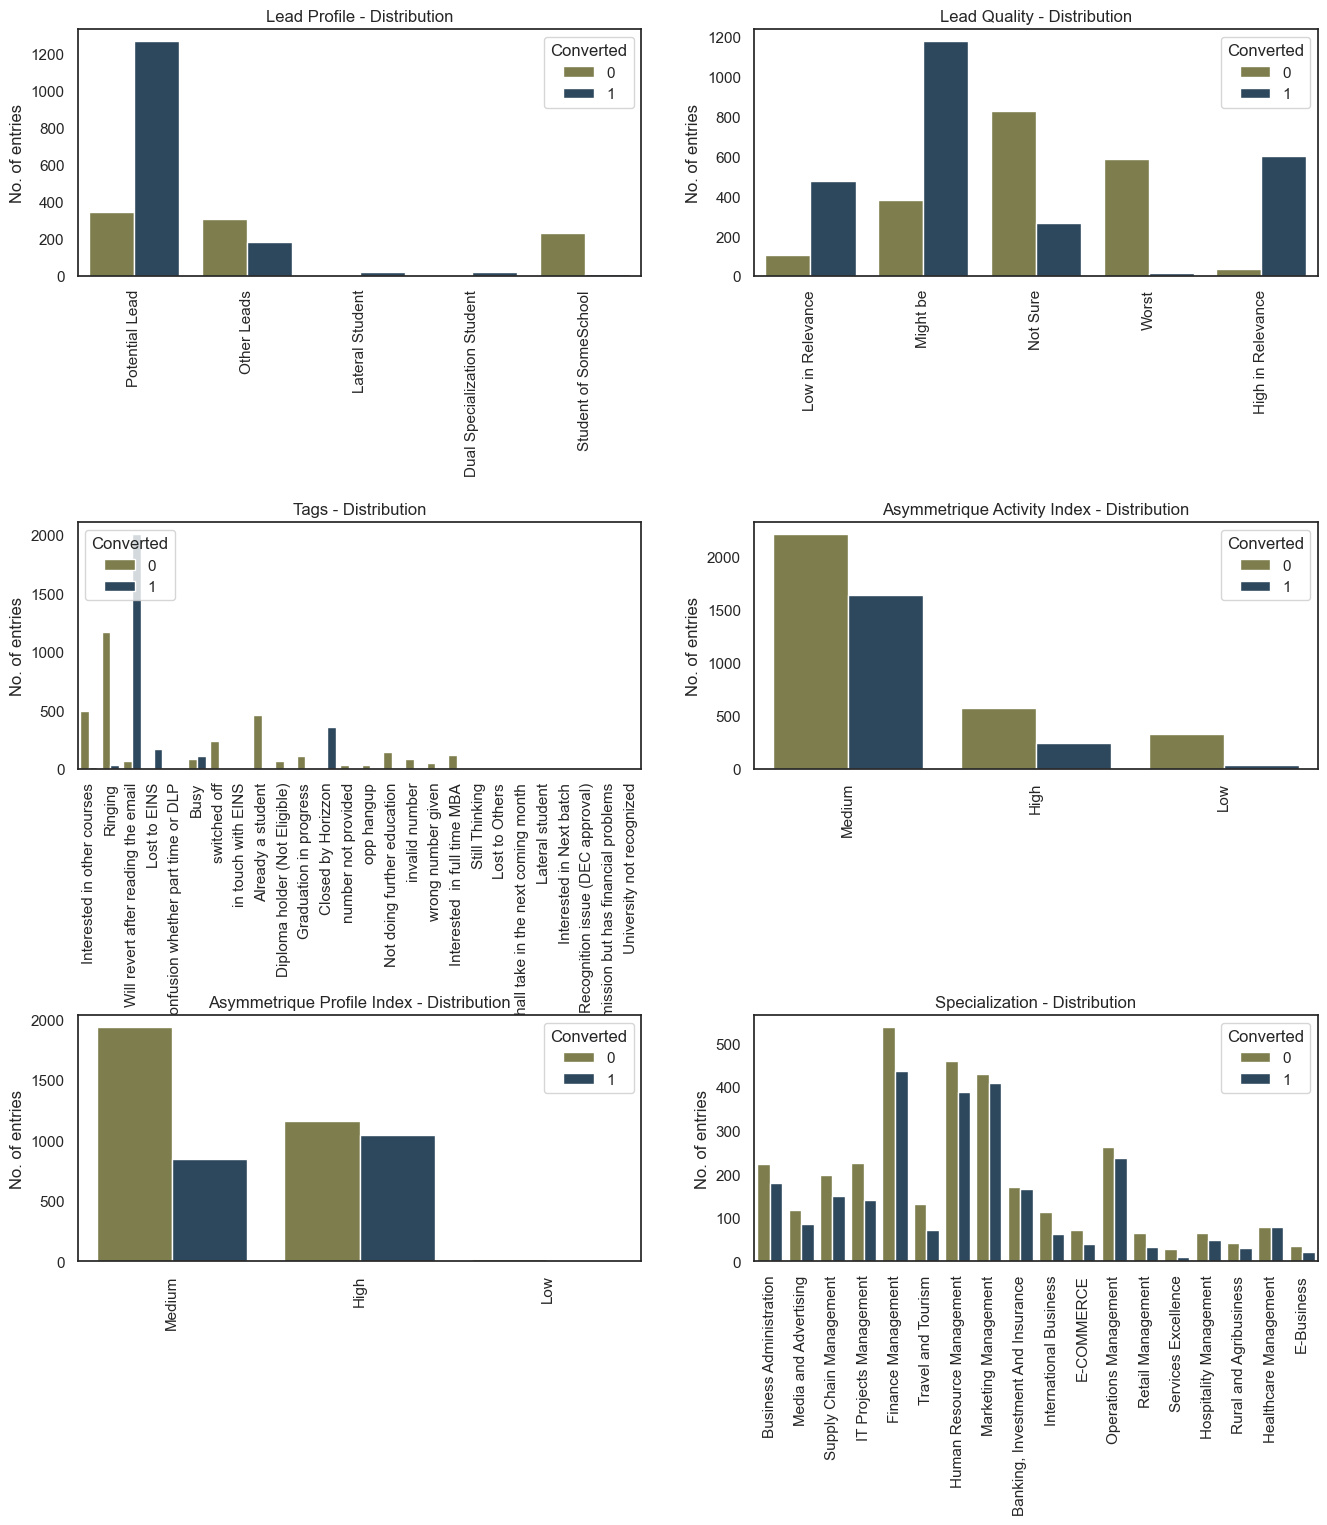

In [35]:
column_list_count4=['Lead Profile','Lead Quality','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Specialization']

# Displaying the distribution of these categorical variables' histograms
plt.figure(figsize=(16,16))
for i in range(len(column_list_count4)):
    plt.subplot(3, 2, i+1)
    var=column_list_count4[i]
    sns.countplot(x= var, hue = 'Converted', data = sarat_df, palette=['#858545',"#254865"])
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 1)

It is evident from the above graph that a small number of specific values for "Tags," "Lead Profile," and "Lead Quality" have a significant impact on the "Converted" result. Input of these fields will therefore introduce bias. For now, let's refer to them as "Unknown". The Dummy Variables phase is where they can be handled.

In [36]:
# Let's substitute Unknown as value for NaN values in Lead Profile.
sarat_df['Lead Profile'].fillna(('Unknown'), inplace=True)

# Let's use Unknown as the value in place of NaN values for Lead Quality.
sarat_df['Lead Quality'].fillna(('Unknown'), inplace=True) 

# Let's substitute Unknown as value for NaN values in tags.
sarat_df['Tags'].fillna(('Unknown'), inplace=True)

In [37]:
# Let's use Unknown as the value in place of NaN values for specialisation.
sarat_df['Specialization'].fillna(('Unknown'), inplace=True)

With no bias, compute the Asymmetrique Index fields. If, for example, 25% of the valid data contains the value "High", then 25% of the NaN will be updated as High, and so on. Imputing is done using the same percentage distribution of the values in the column.

In [38]:
xx1_df=pd.DataFrame(sarat_df['Asymmetrique Profile Index'].value_counts())
xx1_df.reset_index(inplace=True)
xx1_df.columns=['Asymmetrique Profile Index','count']
xx1_df
sums=xx1_df['count'].sum()
null_length=len(sarat_df.loc[sarat_df['Asymmetrique Profile Index'].isnull() == True])
i=0
j=0
for p,row in sarat_df.loc[sarat_df['Asymmetrique Profile Index'].isnull() == True].iterrows():
    sarat_df.at[p,'Asymmetrique Profile Index']=xx1_df['Asymmetrique Profile Index'][i]
    j=j+1
    if round(j/null_length*100,2) >= round(xx1_df['count'][i]/sums*100,2):
        j=0
        i=i+1

In [39]:
xx1_df=pd.DataFrame(sarat_df['Asymmetrique Activity Index'].value_counts())
xx1_df.reset_index(inplace=True)
xx1_df.columns=['Asymmetrique Activity Index','count']
xx1_df
sums=xx1_df['count'].sum()
null_length=len(sarat_df.loc[sarat_df['Asymmetrique Activity Index'].isnull() == True])
i=0
j=0
for p,row in sarat_df.loc[sarat_df['Asymmetrique Activity Index'].isnull() == True].iterrows():
    sarat_df.at[p,'Asymmetrique Activity Index']=xx1_df['Asymmetrique Activity Index'][i]
    j=j+1
    if round(j/null_length*100,2) >= round(xx1_df['count'][i]/sums*100,2):
        j=0
        i=i+1

After adjustments, check the column distribution.

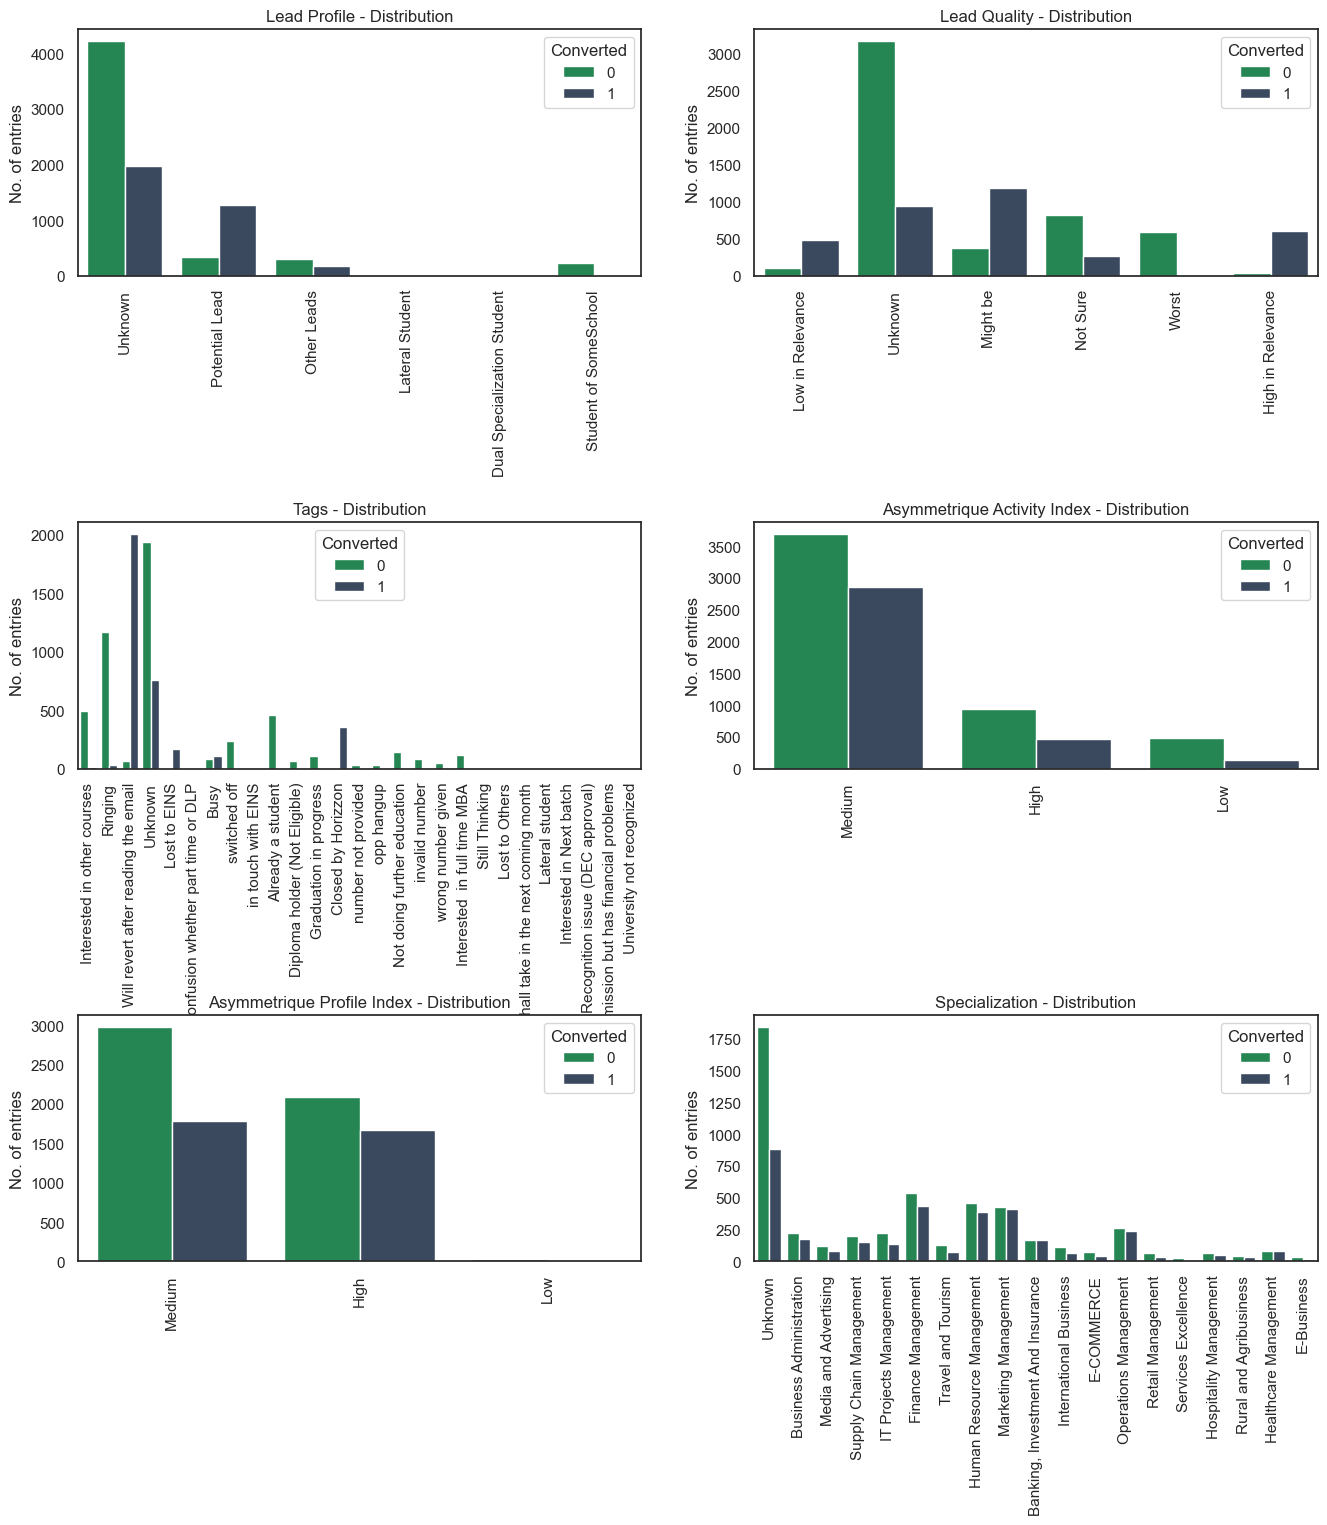

In [40]:
column_list_count4=['Lead Profile','Lead Quality','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Specialization']

# Displaying the distribution of all category variables' histograms
plt.figure(figsize=(16,16))
for i in range(len(column_list_count4)):
    plt.subplot(3, 2, i+1)
    var=column_list_count4[i]
    #sns.countplot(leads_df[var])
    sns.countplot(x= var, hue = 'Converted', data = sarat_df, palette=['#159654',"#354865"])
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 1)

Verify if any fields are still NULL.

In [41]:
lead_nullfields_value=round((sarat_df.isna().sum())/len(sarat_df.index) * 100,2)
print(lead_nullfields_value[lead_nullfields_value > 0])

Series([], dtype: float64)


In [42]:
sarat_df.shape

(8576, 25)

Examine the distribution of values in the remaining Non-NULL categorical variables.

In [43]:
print(sarat_df['Do Not Email'].value_counts())
print(sarat_df['Do Not Call'].value_counts())
print(sarat_df['Search'].value_counts())
print(sarat_df['Newspaper Article'].value_counts())
print(sarat_df['X Education Forums'].value_counts())
print(sarat_df['Newspaper'].value_counts())
print(sarat_df['Digital Advertisement'].value_counts())
print(sarat_df['Through Recommendations'].value_counts())
print(sarat_df['A free copy of Mastering The Interview'].value_counts())

No     7896
Yes     680
Name: Do Not Email, dtype: int64
No     8574
Yes       2
Name: Do Not Call, dtype: int64
No     8562
Yes      14
Name: Search, dtype: int64
No     8574
Yes       2
Name: Newspaper Article, dtype: int64
No     8575
Yes       1
Name: X Education Forums, dtype: int64
No     8575
Yes       1
Name: Newspaper, dtype: int64
No     8572
Yes       4
Name: Digital Advertisement, dtype: int64
No     8569
Yes       7
Name: Through Recommendations, dtype: int64
No     5694
Yes    2882
Name: A free copy of Mastering The Interview, dtype: int64


Remove the columns with a high percentage of single-valued data. The Model doesn't gain anything from these data columns.

In [44]:
# Remove the column containing a lot of single-valued data. The Model doesn't gain anything from these data columns.
sarat_df=sarat_df.drop('Do Not Call',axis=1)
sarat_df=sarat_df.drop('Search',axis=1)
sarat_df=sarat_df.drop('Newspaper Article',axis=1)
sarat_df=sarat_df.drop('X Education Forums',axis=1)
sarat_df=sarat_df.drop('Newspaper',axis=1)
sarat_df=sarat_df.drop('Digital Advertisement',axis=1)
sarat_df=sarat_df.drop('Through Recommendations',axis=1)

Numerical Variable ananlysis

In [45]:
# Compile a list of the DataFrame's numerical variables.
numerical_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sarat_df[numerical_vars].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8576.000000,8576.000000,8576.000000
mean,3.594216,509.471199,2.477975
std,4.916348,552.873572,2.139830
min,0.000000,0.000000,0.000000
25%,1.000000,34.000000,1.000000
50%,3.000000,268.000000,2.000000
75%,5.000000,972.000000,3.500000
max,251.000000,2272.000000,55.000000


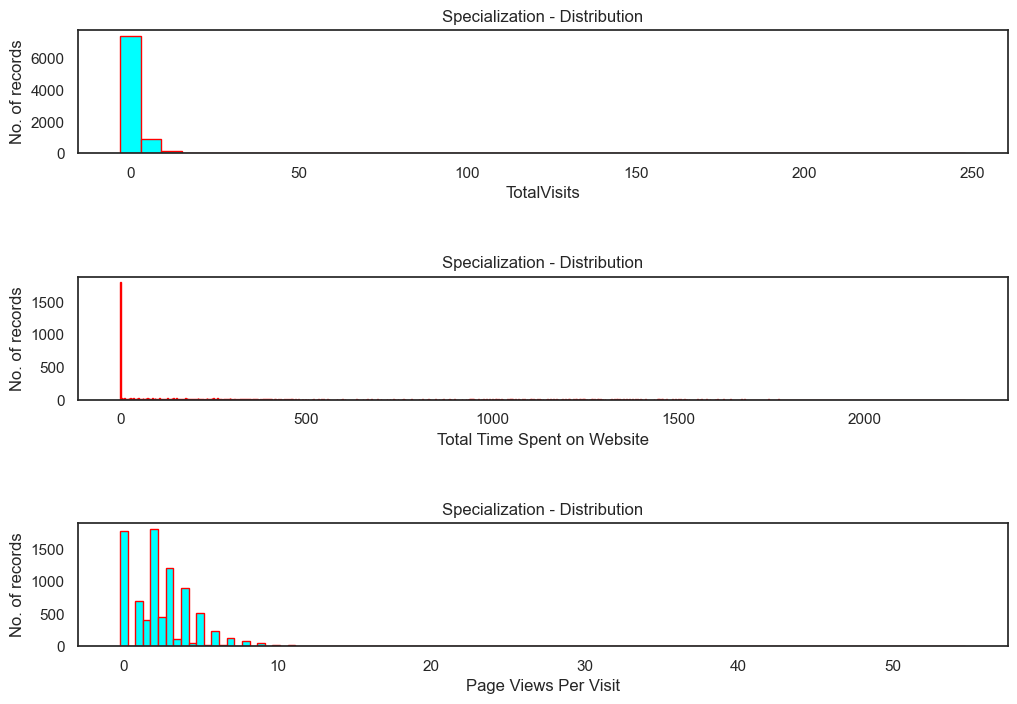

In [46]:
# Making the histogram of the distribution of all numerical variables visible
plt.figure(figsize=(12,8))
for i in range(len(numerical_vars)):
    plt.subplot(3,1, i+1)
    varaible=numerical_vars[i]
    sarat_df[varaible].plot.hist(color = 'cyan',edgecolor = 'red',bins=(len(sarat_df[varaible].unique())), align='left')
    plt.title(var+' - Distribution')
    plt.xlabel(varaible)
    plt.ylabel('No. of records')
    plt.subplots_adjust(hspace = 1)   

The graph above highlights any potential outliers in the data. Let's get rid of outliers.

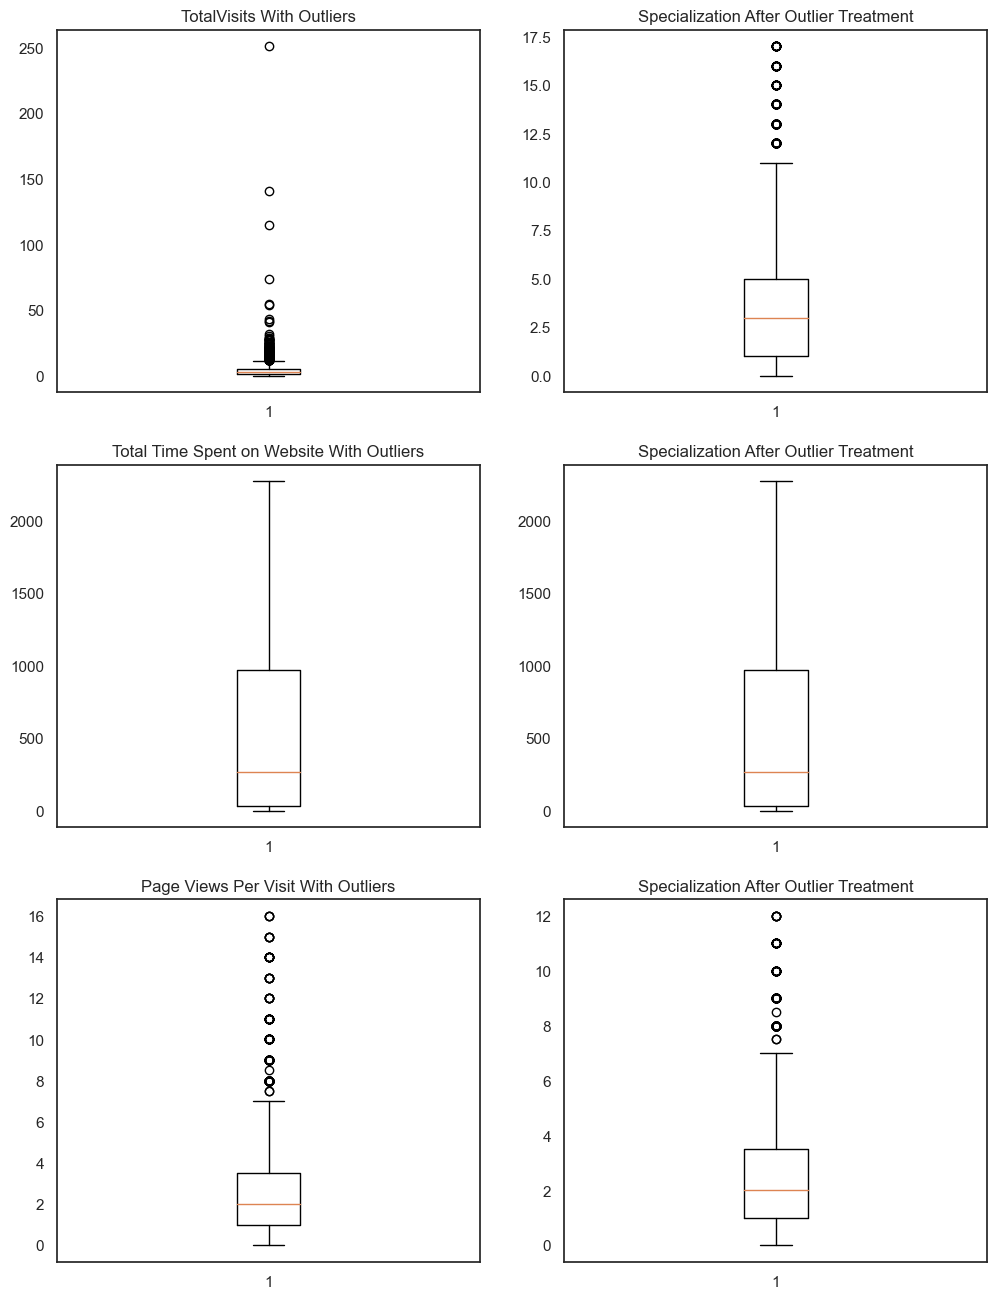

In [47]:
# Construct a box plot showing all the variables both before and after the outlier treatment.
plt.figure(figsize=(12,16))
p_columns=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
p=0

for j in range(len(p_columns)):
    varaible=p_columns[j]
    p=p+1
    plt.subplot(3, 2, p)
    plt.title(varaible+' With Outliers')
    plt.boxplot(sarat_df[varaible])
    Q1 = sarat_df[varaible].quantile(0.05)
    Q3 = sarat_df[varaible].quantile(0.90)
    IQR = Q3 - Q1
    sarat_df = sarat_df[(sarat_df[varaible] >= Q1 - 1.5*IQR) & (sarat_df[varaible] <= Q3 + 1.5*IQR)]
    p=p+1
    plt.subplot(3, 2, p)
    plt.title(var+' After Outlier Treatment')
    plt.boxplot(sarat_df[varaible])

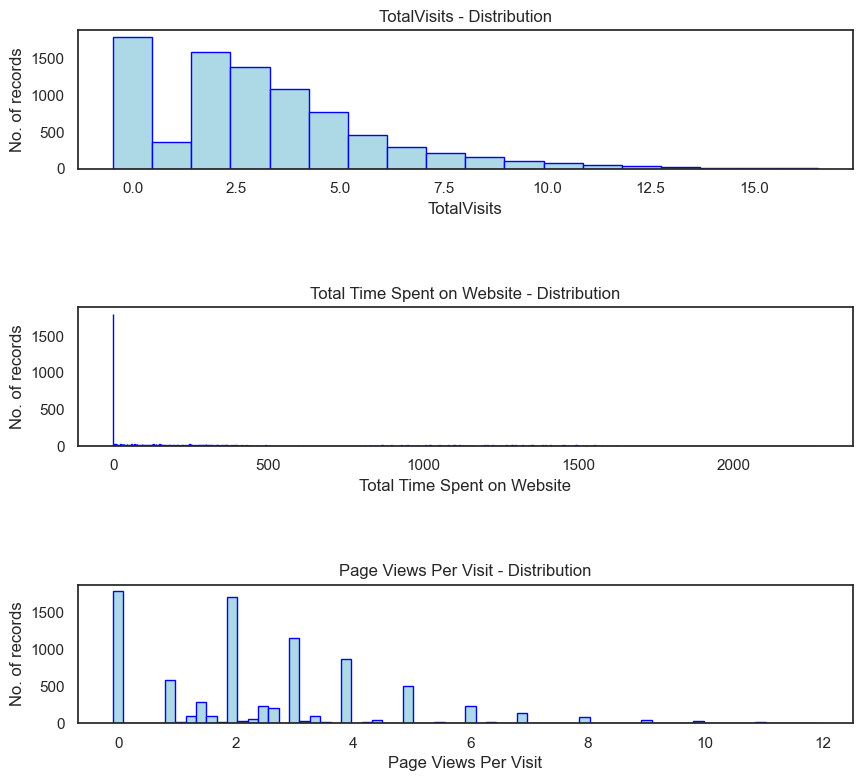

In [48]:
# Displaying the histogram of the distribution of all numerical variables following the removal of outliers
plt.figure(figsize=(10,9))
for i in range(len(numerical_vars)):
    plt.subplot(3,1, i+1)
    varaible=numerical_vars[i]
    sarat_df[varaible].plot.hist(color = 'lightblue',edgecolor = 'blue',bins=(len(sarat_df[varaible].unique())), align='left')
    plt.title(varaible+' - Distribution')
    plt.xlabel(varaible)
    plt.ylabel('No. of records')
    plt.subplots_adjust(hspace = 1)   

Text(0, 0.5, 'No. of records')

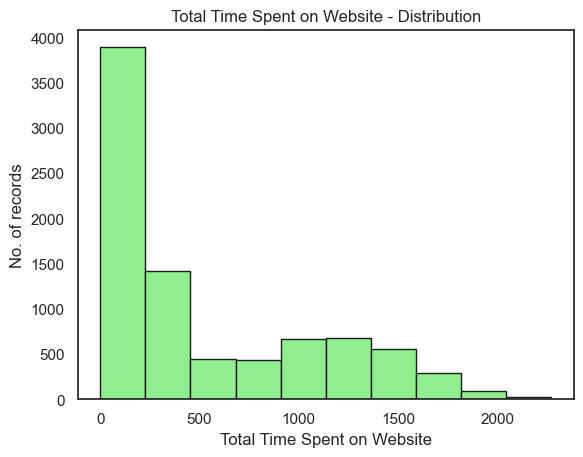

In [49]:
sarat_df['Total Time Spent on Website'].plot.hist(color = 'lightgreen', edgecolor = 'k')
plt.title('Total Time Spent on Website - Distribution')
plt.xlabel('Total Time Spent on Website')
plt.ylabel('No. of records')

Make the numerical data's heat map.

<AxesSubplot:>

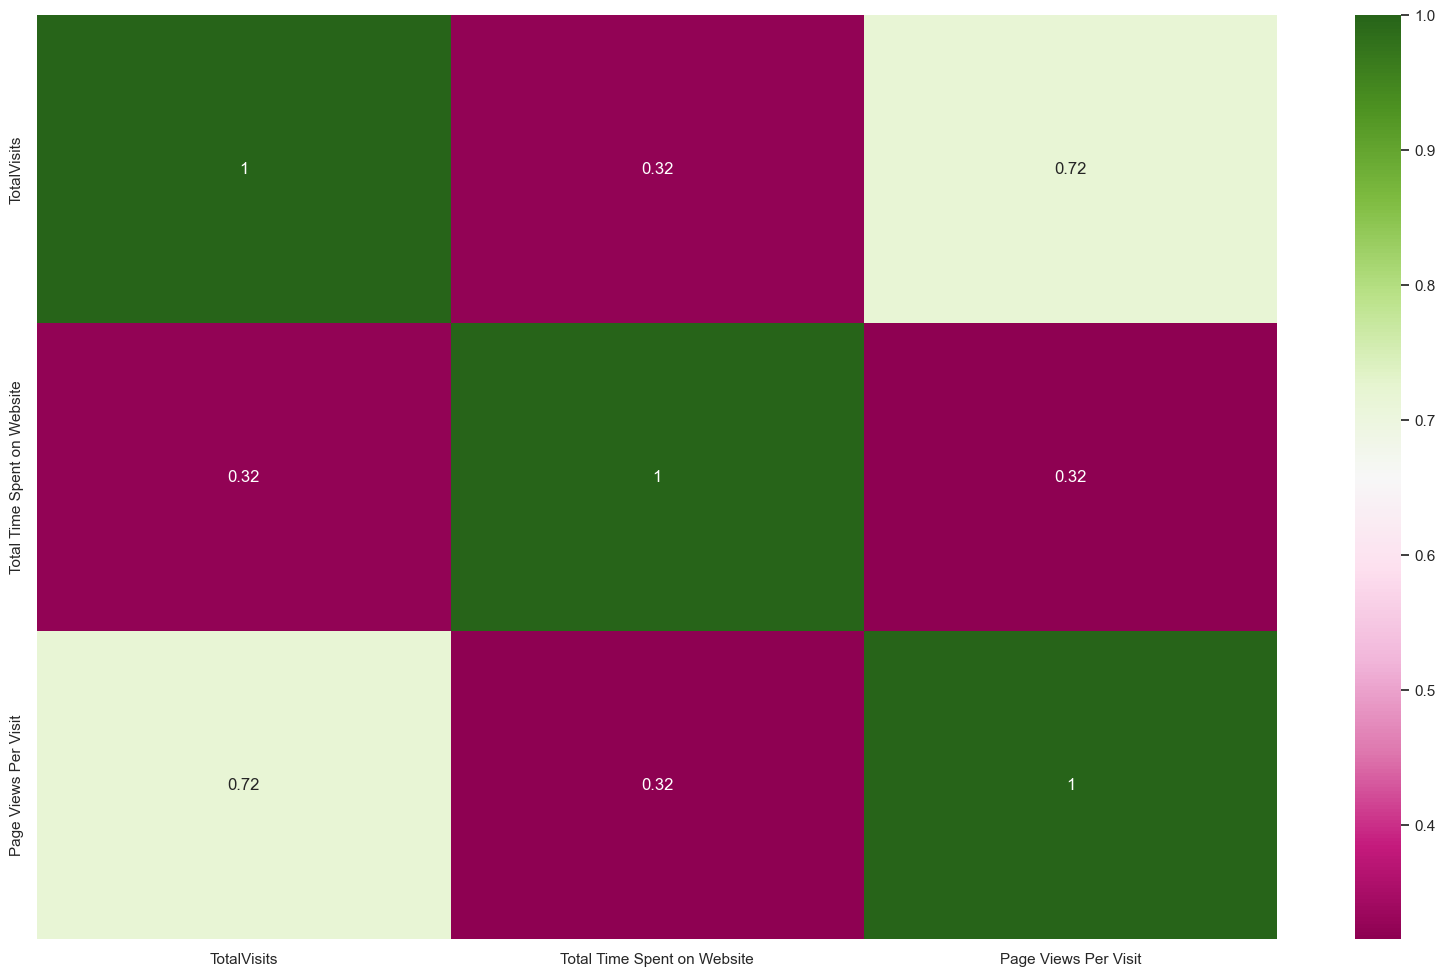

In [50]:
# Choose a figure size.
plt.figure(figsize=(20,12))

# Generate the heatmap
sns.heatmap(sarat_df[p_columns].corr(),cmap='PiYG', annot=True)

Page Views Per Visit and TotalVisits have a strong correlation of 0.72.

Create a pie chart showing how the target variable is distributed.

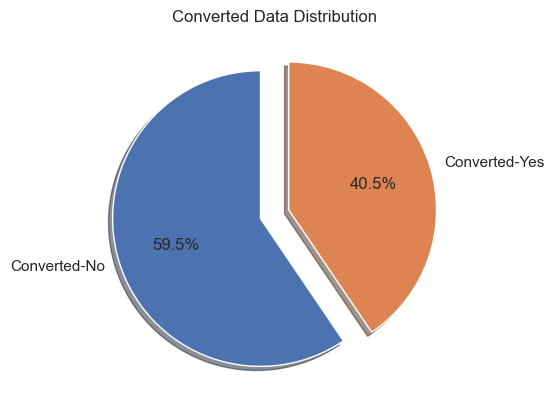

In [51]:
explode = (0.1, 0.1) 

pie_labels = ['Converted-No', 'Converted-Yes']
pie_sizes_m = sarat_df['Converted'].value_counts()/len(sarat_df.index) * 100
plt.pie(pie_sizes_m, labels=pie_labels, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Converted Data Distribution')

plt.show()

In [52]:
sarat_df['Converted'].value_counts()

0    5041
1    3433
Name: Converted, dtype: int64

In [53]:
sarat_df.shape

(8474, 18)

# DATA ANALYSIS END's HERE .


###### Encoding of Categorical variables

In [54]:
print(sarat_df['Do Not Email'].value_counts())
print(sarat_df['A free copy of Mastering The Interview'].value_counts())

No     7813
Yes     661
Name: Do Not Email, dtype: int64
No     5656
Yes    2818
Name: A free copy of Mastering The Interview, dtype: int64


In [55]:
no_and_yes_list=['Do Not Email','A free copy of Mastering The Interview']

for varaible in no_and_yes_list:
    #Making dummy variables for category variables.
    dummy_df = pd.get_dummies(sarat_df[varaible],prefix=varaible)
    sarat_df = pd.concat([sarat_df,dummy_df], axis=1)
    # removing the "Yes" entries since there are less of them
    sarat_df.drop([varaible,varaible+'_Yes'], axis =1 , inplace=True)

sarat_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Last Notable Activity,Do Not Email_No,A free copy of Mastering The Interview_No
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,Low in Relevance,Unknown,Medium,Medium,Modified,1,1
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,Unknown,Unknown,Medium,Medium,Email Opened,1,1
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Potential Lead,Medium,High,Email Opened,1,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Unknown,Medium,High,Modified,1,1
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Will revert after reading the email,Might be,Unknown,Medium,High,Modified,1,1


Check the values in the categorical variables and group the minor values into one single dummy value.

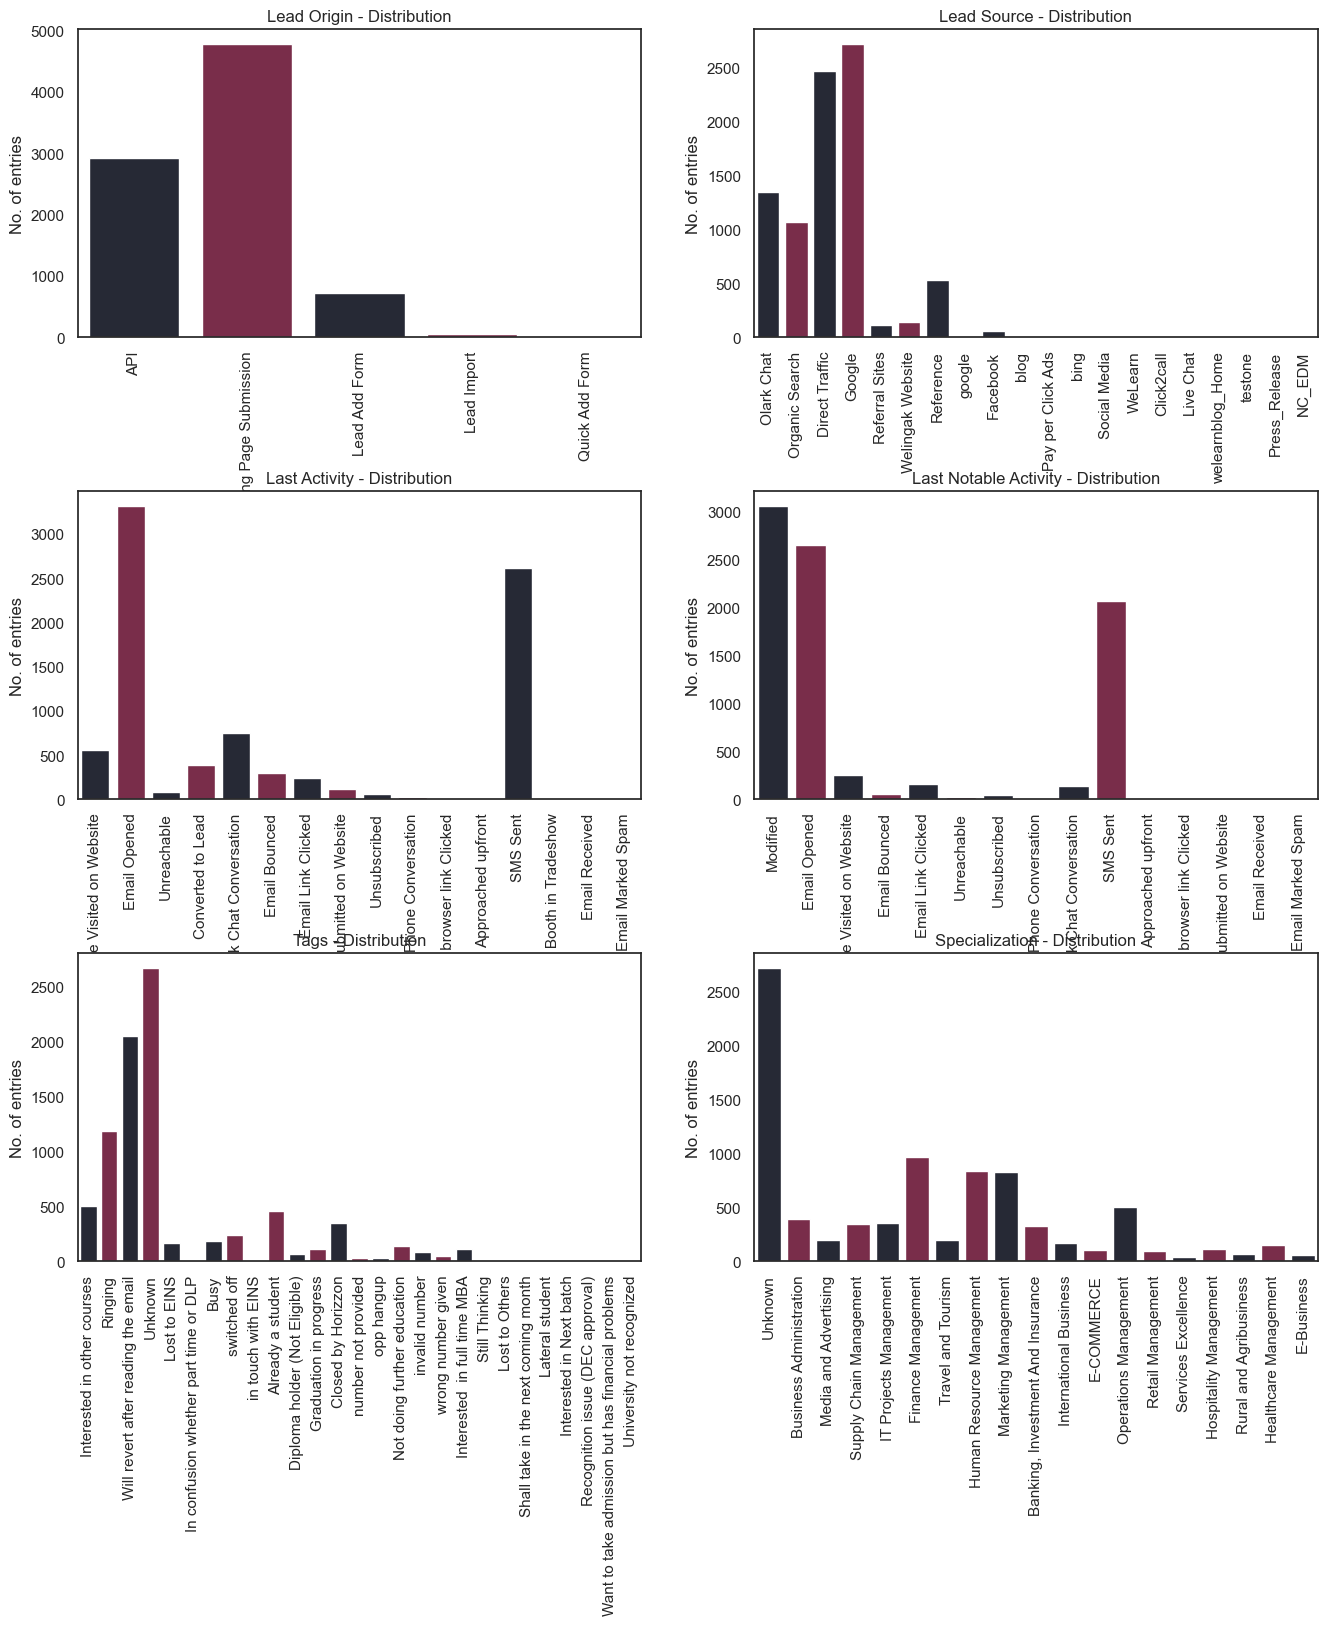

In [56]:
column_lis_catog=['Lead Origin','Lead Source','Last Activity','Last Notable Activity','Tags','Specialization']

# displaying the distribution of all category variables' histograms
plt.figure(figsize=(16,16))
for i in range(len(column_lis_catog)):
    plt.subplot(3, 2, i+1)
    var=column_lis_catog[i]
    sns.countplot(x=var, data=sarat_df , palette = ['#232737' , '#852147'])
    plt.title(var+' - Distribution') 
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

In [57]:
print(sarat_df['Tags'].value_counts())
print(sarat_df['Specialization'].value_counts())

Unknown                                              2666
Will revert after reading the email                  2053
Ringing                                              1182
Interested in other courses                           506
Already a student                                     462
Closed by Horizzon                                    348
switched off                                          237
Busy                                                  185
Lost to EINS                                          169
Not doing further education                           138
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    27
in touch with 

In [58]:
##Put all of these columns' minor values into a single viz. Others
for p,row in sarat_df.iterrows():
    if sarat_df.at[p,'Lead Origin']== 'Quick Add Form':
        sarat_df.at[p,'Lead Origin'] = 'Others'
    
    if sarat_df.at[p,'Lead Source']== 'google':
        sarat_df.at[p,'Lead Source'] = 'Google'
    elif sarat_df.at[p,'Lead Source'] in (['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat',
                                           'welearnblog_Home','testone','Press_Release','NC_EDM']):
        sarat_df.at[p,'Lead Source'] = 'Others'
    
    if sarat_df.at[p,'Last Activity'] in (['Had a Phone Conversation','Approached upfront','View in browser link Clicked',
                                           'Email Marked Spam','Email Received','Visited Booth in Tradeshow']):
        sarat_df.at[p,'Last Activity'] = 'Others'
    
    if sarat_df.at[p,'Last Notable Activity'] in (['Unreachable','Had a Phone Conversation','Email Marked Spam',
                                                   'Approached upfront','View in browser link Clicked','Email Received',
                                                   'Form Submitted on Website']):
        sarat_df.at[p,'Last Notable Activity'] = 'Others'
    
    if sarat_df.at[p,'Tags'] in (['wrong number given','opp hangup','number not provided','in touch with EINS',
                                  'Lost to Others','Want to take admission but has financial problems','Still Thinking',
                                  'Interested in Next batch','In confusion whether part time or DLP','Lateral student',
                                  'University not recognized','Shall take in the next coming month',
                                  'Recognition issue (DEC approval)']):
        sarat_df.at[p,'Tags'] = 'Others'
        
print(sarat_df['Lead Origin'].value_counts())
print(sarat_df['Lead Source'].value_counts())
print(sarat_df['Last Activity'].value_counts())
print(sarat_df['Last Notable Activity'].value_counts())
print(sarat_df['Tags'].value_counts())

Landing Page Submission    4775
API                        2927
Lead Add Form               716
Lead Import                  55
Others                        1
Name: Lead Origin, dtype: int64
Google              2724
Direct Traffic      2471
Olark Chat          1345
Organic Search      1066
Reference            533
Welingak Website     142
Referral Sites       119
Facebook              55
Others                19
Name: Lead Source, dtype: int64
Email Opened                 3315
SMS Sent                     2610
Olark Chat Conversation       750
Page Visited on Website       557
Converted to Lead             389
Email Bounced                 301
Email Link Clicked            246
Form Submitted on Website     113
Unreachable                    89
Unsubscribed                   56
Others                         48
Name: Last Activity, dtype: int64
Modified                   3055
Email Opened               2651
SMS Sent                   2063
Page Visited on Website     259
Email Link Clic

In [59]:
#Drop the "Others" values and create the dummy variables.
column_lis_catog=['Lead Origin','Lead Source','Last Activity','Last Notable Activity']

for var in column_lis_catog:
    #adding dummy variables to category variables
    dummy_df = pd.get_dummies(sarat_df[var],prefix=var)
    sarat_df = pd.concat([sarat_df,dummy_df], axis=1)
    # removing the Other entries since they are fewer in number
    sarat_df.drop([var,var+'_Others'], axis =1 , inplace=True)

sarat_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,660737,0,0.0,0,0.0,Unknown,Unemployed,Interested in other courses,Low in Relevance,Unknown,Medium,Medium,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,Unknown,Unemployed,Ringing,Unknown,Unknown,Medium,Medium,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,660727,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Might be,Potential Lead,Medium,High,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,660719,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Not Sure,Unknown,Medium,High,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,660681,1,2.0,1428,1.0,Unknown,Unemployed,Will revert after reading the email,Might be,Unknown,Medium,High,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [60]:
#Drop the "Unknown" and "Others" values into the fake variables you create.
column_lis_catog2=['Specialization','What is your current occupation','Tags','Lead Quality','Lead Profile']

for var in column_lis_catog2:
    # adding dummy variables to category variables
    dummy_df = pd.get_dummies(sarat_df[var],prefix=var)
    sarat_df = pd.concat([sarat_df,dummy_df], axis=1)
    # removing the Other entries since they are fewer in number
    sarat_df.drop([var,var+'_Unknown'], axis =1 , inplace=True)
    if var == 'Tags':
        sarat_df.drop([var+'_Others'], axis =1 , inplace=True)
        

sarat_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Asymmetrique Profile Index,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
0,660737,0,0.0,0,0.0,Medium,Medium,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,Medium,Medium,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,Medium,High,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,660719,0,1.0,305,1.0,Medium,High,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,Medium,High,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [61]:
# Dummy Variables for Index columns
column_lis_catog3=['Asymmetrique Activity Index','Asymmetrique Profile Index']

for var in column_lis_catog3:
    # adding dummy variables to category variables
    dummy_df = pd.get_dummies(sarat_df[var],prefix=var)
    sarat_df = pd.concat([sarat_df,dummy_df], axis=1)
    # removing the Other entries since they are fewer in number
    sarat_df.drop([var,var+'_Low'], axis =1 , inplace=True)

sarat_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
0,660737,0,0.0,0,0.0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,660728,0,5.0,674,2.5,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,660727,1,2.0,1532,2.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
3,660719,0,1.0,305,1.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,660681,1,2.0,1428,1.0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [62]:
sarat_df.shape

(8474, 88)

Part 1C. Test-Train Split

In [63]:
# To create the X features, remove the Lead Number and Converted fields.
X=sarat_df.drop(['Lead Number','Converted'], axis =1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
0,0.0,0,0.0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,5.0,674,2.5,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,2.0,1532,2.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
3,1.0,305,1.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,2.0,1428,1.0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [64]:
# Create the Y variable
y = sarat_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

#Splitting the data into train and test

In [65]:
# 70:30 should be divided into Training and Test Data.
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [66]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
4278,2.0,454,2.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
5893,2.0,532,2.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
380,0.0,0,0.0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8976,1.0,16,1.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4197,0.0,0,0.0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1


In [67]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
7813,3.0,260,3.0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
7256,0.0,0,0.0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
6531,0.0,0,0.0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
314,11.0,188,5.5,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
9094,2.0,759,1.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [68]:
# Scale the data to account for differences in the magnitude and range of the numerical variables.
number_vari= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

scaler = StandardScaler()

X_train[number_vari] = scaler.fit_transform(X_train[number_vari])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
4278,-0.454824,-0.101516,-0.226094,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
5893,-0.454824,0.038946,-0.226094,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
380,-1.137752,-0.919072,-1.240916,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8976,-0.796288,-0.890260,-0.733505,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4197,-1.137752,-0.919072,-1.240916,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1


## Test-Train Splitting & Scaling Ends here

#### Model Building

In [69]:
# Logistic Regression Model
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5845
Model Family:                Binomial   Df Model:                           85
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -990.23
Date:                Tue, 25 Apr 2023   Deviance:                       1980.5
Time:                        23:49:20   Pearson chi2:                 9.15e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6391
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.9590    1.5e+05      0.000      1.000   -2.94e+05    2.94e+05
TotalVisits                                              0.2432      0.092      2.631      0.009       0.062       0.424
Total Time Spent on Website                              1.0165      0.069     14.806      0.000       0.882       1.151
Page Views Per Visit                                    -0.1808      0.098     -1.852      0.064      -0.372       0.011
Do Not Email_No                                          1.1164      0.355      3.149      0.002       0.421       1.811
A free copy of Mastering The Interview_No               -0.0510      0.196     -0.260      0.795      -0.436       0.334
Lead Origin_API                                        -23.8961    1.5e+05     -0.000      1.000   -2.94e+05    2.94e+05
Lead Origin_Landing Page Submission                    -24.1475    1.5e+05     -0.000      1.000   -2.94e+05    2.94e+05
Lead Origin_Lead Add Form                              -23.5729    1.5e+05     -0.000      1.000   -2.94e+05    2.94e+05
Lead Origin_Lead Import                                -12.8579   7.51e+04     -0.000      1.000   -1.47e+05    1.47e+05
Lead Source_Direct Traffic                              -1.0584      1.538     -0.688      0.491      -4.073       1.956
Lead Source_Facebook                                   -12.8579   7.51e+04     -0.000      1.000   -1.47e+05    1.47e+05
Lead Source_Google                                      -0.7514      1.529     -0.491      0.623      -3.748       2.246
Lead Source_Olark Chat                                   0.1308      1.541      0.085      0.932      -2.890       3.152
Lead Source_Organic Search                              -1.0972      1.541     -0.712      0.477      -4.118       1.923
Lead Source_Reference                                   -1.0950      1.719     -0.637      0.524      -4.463       2.273
Lead Source_Referral Sites                              -1.3336      1.611     -0.828      0.408      -4.492       1.825
Lead Source_Welingak Website                             3.6480      1.961      1.861      0.063      -0.195       7.491
Last Activity_Converted to Lead                         -0.0246      1.014     -0.024      0.981      -2.011       1.962
Last Activity_Email Bounced                              0.3990      1.136      0.351      0.725      -1.827       2.625
Last Activity_Email Link Clicked                         0.7707      1.197      0.644      0.520      -1.575       3.116
Last Activity_Email Opened                               0.7036      0.963      0.730      0.465      -1.184       2.591
Last Activity_Form Submitted on Website                  0

Implement RFE for Feature Elimination

In [70]:
logreg=LogisticRegression()
rfe=RFE(logreg,n_features_to_select = 15)
rfe=rfe.fit(X_train,y_train)

In [71]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False])

In [72]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 46),
 ('Total Time Spent on Website', False, 11),
 ('Page Views Per Visit', False, 47),
 ('Do Not Email_No', False, 6),
 ('A free copy of Mastering The Interview_No', False, 72),
 ('Lead Origin_API', False, 57),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', False, 9),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Source_Direct Traffic', False, 37),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 41),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 22),
 ('Last Activity_Email Bounced', False, 56),
 ('Last Activity_Email Link Clicked', False, 65),
 ('Last Activity_Email Opened', False, 52),
 ('Last Activity_Form Submitted on Website', False, 35),
 ('Last Activity_Olark Chat Conversation', False, 21),

Get the list of RFE selected columns

In [73]:
colm = X_train.columns[rfe.support_]
colm

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Worst'],
      dtype='object')

In [74]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Do Not Email_No', 'A free copy of Mastering The Interview_No',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email

Create the model using the selected RFE columns.

In [75]:
X_train_sm = sm.add_constant(X_train[colm])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5915
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1454.9
Date:                Tue, 25 Apr 2023   Deviance:                       2909.8
Time:                        23:49:23   Pearson chi2:                 6.54e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5779
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9022      0.079    -24.084      0.000      -2.057      -1.747
Lead Source_Welingak Website                             4.2635      1.009      4.224      0.000       2.285       6.242
What is your current occupation_Unemployed               1.9606      0.106     18.471      0.000       1.753       2.169
What is your current occupation_Working Professional     2.0630      0.315      6.550      0.000       1.446       2.680
Tags_Already a student                                  -4.1670      0.717     -5.813      0.000      -5.572      -2.762
Tags_Closed by Horizzon                                  5.5932      1.014      5.516      0.000       3.606       7.581
Tags_Diploma holder (Not Eligible)                      -3.5105      1.018     -3.448      0.001      -5.506      -1.515
Tags_Interested  in full time MBA                       -2.9783      0.597     -4.986      0.000      -4.149      -1.808
Tags_Interested in other courses                        -3.1432      0.304    -10.340      0.000      -3.739      -2.547
Tags_Lost to EINS                                        4.3120      0.536      8.046      0.000       3.262       5.362
Tags_Not doing further education                        -3.7690      1.015     -3.715      0.000      -5.758      -1.780
Tags_Ringing                                            -3.4406      0.209    -16.447      0.000      -3.851      -3.031
Tags_Will revert after reading the email                 3.5246      0.173     20.322      0.000       3.185       3.865
Tags_invalid number                                    -24.3615   1.65e+04     -0.001      0.999   -3.24e+04    3.24e+04
Tags_switched off                                       -4.0379      0.587     -6.874      0.000      -5.189      -2.887
Lead Quality_Worst                                      -3.4557      0.748     -4.621      0.000      -4.921      -1.990
========================================================================================================================
"""

Utilising the Variance Inflation Factor, examine Multicollinearity

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train[colm].columns
vif['VIF'] = [variance_inflation_factor(X_train[colm].values,i) for i in range(X_train[colm].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.26
9,Tags_Not doing further education,1.22
13,Tags_switched off,1.18
6,Tags_Interested in full time MBA,1.11
0,Lead Source_Welingak Website,1.08
5,Tags_Diploma holder (Not Eligible),1.07
12,Tags_invalid number,1.07
8,Tags_Lost to EINS,1.06
2,What is your current occupation_Working Profes...,0.86
14,Lead Quality_Worst,0.67


Remove the high p-value column because it is not important.

In [77]:
colm=colm.drop('Tags_invalid number',1)

colm

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst'],
      dtype='object')

Rebuild the model.

In [78]:
X_train_sm = sm.add_constant(X_train[colm])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=logm3.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5916
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1488.3
Date:                Tue, 25 Apr 2023   Deviance:                       2976.6
Time:                        23:49:23   Pearson chi2:                 6.60e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5731
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9079      0.079    -24.092      0.000      -2.063      -1.753
Lead Source_Welingak Website                             4.3909      1.009      4.351      0.000       2.413       6.369
What is your current occupation_Unemployed               1.8385      0.105     17.524      0.000       1.633       2.044
What is your current occupation_Working Professional     1.9865      0.315      6.297      0.000       1.368       2.605
Tags_Already a student                                  -4.0378      0.717     -5.635      0.000      -5.442      -2.633
Tags_Closed by Horizzon                                  5.7010      1.015      5.618      0.000       3.712       7.690
Tags_Diploma holder (Not Eligible)                      -3.3832      1.018     -3.323      0.001      -5.379      -1.388
Tags_Interested  in full time MBA                       -2.8539      0.597     -4.780      0.000      -4.024      -1.684
Tags_Interested in other courses                        -3.0180      0.303     -9.946      0.000      -3.613      -2.423
Tags_Lost to EINS                                        4.3704      0.538      8.127      0.000       3.316       5.424
Tags_Not doing further education                        -3.6396      1.014     -3.588      0.000      -5.628      -1.651
Tags_Ringing                                            -3.3131      0.208    -15.898      0.000      -3.722      -2.905
Tags_Will revert after reading the email                 3.6220      0.172     21.000      0.000       3.284       3.960
Tags_switched off                                       -3.9105      0.587     -6.661      0.000      -5.061      -2.760
Lead Quality_Worst                                      -3.5416      0.721     -4.909      0.000      -4.956      -2.128
========================================================================================================================
"""

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train[colm].columns
vif['VIF'] = [variance_inflation_factor(X_train[colm].values, i) for i in range(X_train[colm].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.25
9,Tags_Not doing further education,1.21
12,Tags_switched off,1.17
6,Tags_Interested in full time MBA,1.10
0,Lead Source_Welingak Website,1.07
5,Tags_Diploma holder (Not Eligible),1.06
8,Tags_Lost to EINS,1.06
2,What is your current occupation_Working Profes...,0.84
13,Lead Quality_Worst,0.66
7,Tags_Interested in other courses,0.38


Let's move on to making predictions based on the Training data itself now that the Logistic Regression model has been constructed with all near-ZERO p-values and low VIF (multi-collinearity).

In [80]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [81]:
y_train_pred[:10]

array([9.72149079e-01, 3.28470716e-02, 1.29219395e-01, 1.83443286e-02,
       9.72149079e-01, 4.36281679e-02, 1.29219395e-01, 9.75889460e-01,
       4.76410694e-04, 5.19655356e-01])

In [82]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Index'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index
0,1,0.972149,4278
1,0,0.032847,5893
2,0,0.129219,380
3,0,0.018344,8976
4,1,0.972149,4197


Using 0.5 as the cutoff, add Prediction and% Conversion Probability.

In [83]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Conversion_Prob%'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100,2))

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%
0,1,0.972149,4278,1,97.21
1,0,0.032847,5893,0,3.28
2,0,0.129219,380,0,12.92
3,0,0.018344,8976,0,1.83
4,1,0.972149,4197,1,97.21


Create the Confusion Matrix

In [84]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3446   59]
 [ 586 1840]]


In [85]:
# Let's evaluate the general accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.8912493677288822


In [86]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [87]:
# SENSITIVITY
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")

Sensitivity: 75.85 %


In [88]:
# SPECIFICITY
print("Specificity:",round(100*(TN/float(TN+FP)),2),"%")

Specificity: 98.32 %


In [89]:
# FALSE POSITIVE RATE
print("FPR:",round(100*(FP/float(FP+TN)),2),"%")

FPR: 1.68 %


In [90]:
# FALSE NEGATIVE RATE
print("FPR:",round(100*(FN/float(FN+TP)),2),"%")

FPR: 24.15 %


In [91]:
# positive predictive value
print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")

Positive Predictive Power: 96.89 %


In [92]:
# negative predictive value
print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")

Negative Predictive Power: 85.47 %


In [93]:
# ACCURACY SCORE
print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

ACCURACY SCORE: 89.12 %


### ROC Curve

In [94]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

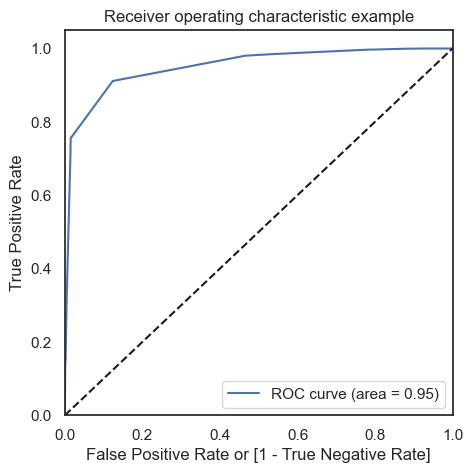

In [96]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Area Under Curve (AUC) value for the MODEL is 0.95, which is a very excellent indicator.

In [97]:
# Let's establish columns with various cutoffs for likelihood. 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.972149,4278,1,97.21,1,1,1,1,1,1,1,1,1,1
1,0,0.032847,5893,0,3.28,1,0,0,0,0,0,0,0,0,0
2,0,0.129219,380,0,12.92,1,1,0,0,0,0,0,0,0,0
3,0,0.018344,8976,0,1.83,1,0,0,0,0,0,0,0,0,0
4,1,0.972149,4197,1,97.21,1,1,1,1,1,1,1,1,1,1


In [98]:
# Let's now determine the accuracy, sensitivity, and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.409037  1.000000  0.000000
0.1   0.1  0.718260  0.979802  0.537233
0.2   0.2  0.890912  0.911377  0.876748
0.3   0.3  0.890912  0.911377  0.876748
0.4   0.4  0.890912  0.911377  0.876748
0.5   0.5  0.891249  0.758450  0.983167
0.6   0.6  0.891924  0.757214  0.985164
0.7   0.7  0.891587  0.756389  0.985164
0.8   0.8  0.891587  0.756389  0.985164
0.9   0.9  0.882313  0.732894  0.985735


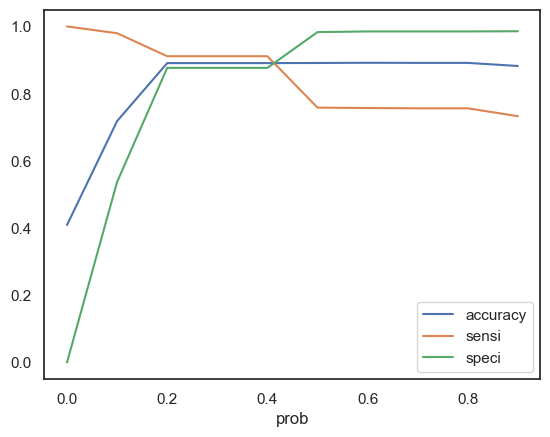

In [99]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

The various cutoff are plotted and 0.4 is where all values are converging. Let's re-calculate the final predicted values using 0.4 as threshold.

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.972149,4278,1,97.21,1,1,1,1,1,1,1,1,1,1,1
1,0,0.032847,5893,0,3.28,1,0,0,0,0,0,0,0,0,0,0
2,0,0.129219,380,0,12.92,1,1,0,0,0,0,0,0,0,0,0
3,0,0.018344,8976,0,1.83,1,0,0,0,0,0,0,0,0,0,0
4,1,0.972149,4197,1,97.21,1,1,1,1,1,1,1,1,1,1,1


In [101]:
# Let's evaluate the general accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.890912156466026

In [102]:
# Produce a new Confusion Matrix for the new threshold
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3073,  432],
       [ 215, 2211]], dtype=int64)

In [103]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [104]:
# SENSITIVITY
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")

Sensitivity: 91.14 %


In [105]:
# SPECIFICITY
print("Specificity:",round(100*(TN/float(TN+FP)),2),"%")

Specificity: 87.67 %


In [106]:
# FALSE POSITIVE RATE
print("FPR:",round(100*(FP/float(FP+TN)),2),"%")

FPR: 12.33 %


In [107]:
# FALSE NEGATIVE RATE
print("FNR:",round(100*(FN/float(FN+TP)),2),"%")

FNR: 8.86 %


In [108]:
# positive predictive value
print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")

Positive Predictive Power: 83.65 %


In [109]:
# negative predictive value
print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")

Negative Predictive Power: 93.46 %


In [110]:
# ACCURACY SCORE
print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

ACCURACY SCORE: 89.09 %


### Precision and Recall

In [111]:
print("Precision Score of the Model:",round(100*(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)),2),"%")

Precision Score of the Model: 83.65 %


In [112]:
print("Recall Score of the Model:",round(100*(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)),2),"%")

Recall Score of the Model: 91.14 %


In [113]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

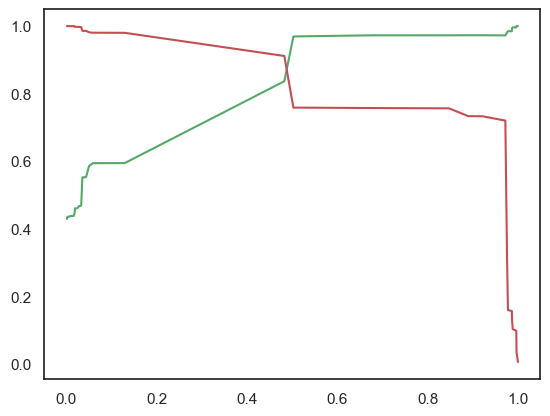

In [114]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Part 2: Test Data Predictions

Transform the test data

In [115]:
X_test[number_vari] = scaler.transform(X_test[number_vari])

In [116]:
X_test = X_test[colm]
X_test.head()

,Lead Source_Welingak Website,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst
7813,0,1,0,0,0,1,0,0,0,0,0,0,0,0
7256,0,1,0,0,0,0,0,1,0,0,0,0,0,0
6531,0,1,0,0,0,0,0,0,0,0,0,0,0,0
314,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9094,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Add constant to test data befpre predictions

In [117]:
X_test_sm = sm.add_constant(X_test)

Create y_test predictions

In [118]:
y_test_pred = res.predict(X_test_sm)

In [119]:
y_test_pred[:10]

7813    0.030692
7256    0.043628
6531    0.482658
314     0.129219
9094    0.482658
1284    0.043628
3842    0.032847
1611    0.482658
8592    0.986894
493     0.972149
dtype: float64

Converting y_pred to a dataframe from an array

In [120]:

y_pred_1 = pd.DataFrame(y_test_pred)

In [121]:
# Let's see the head
y_pred_1.head()

,0
7813,0.030692
7256,0.043628
6531,0.482658
314,0.129219
9094,0.482658


Converting y_test to dataframe

In [122]:
y_test_df = pd.DataFrame(y_test)

In [123]:
# # Using the Lead Index as the Index
y_test_df['Lead Index'] = y_test_df.index

In [124]:
# Deleting the index for each dataframe in order to add them side by side. 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [125]:
# Adding y_pred_1 and y_test_df
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [126]:

y_pred_final.head()

,Converted,Lead Index,0
0,0,7813,0.030692
1,0,7256,0.043628
2,0,6531,0.482658
3,0,314,0.129219
4,1,9094,0.482658


In [127]:
# Column renaming 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [128]:
# Let's look at y_pred_final's head.
y_pred_final.head()

,Converted,Lead Index,Converted_Prob
0,0,7813,0.030692
1,0,7256,0.043628
2,0,6531,0.482658
3,0,314,0.129219
4,1,9094,0.482658


In [129]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final['Conversion_Prob%'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100,2))

# Let's see the head
y_pred_final.head()

,Converted,Lead Index,Converted_Prob,final_predicted,Conversion_Prob%
0,0,7813,0.030692,0,3.07
1,0,7256,0.043628,0,4.36
2,0,6531,0.482658,1,48.27
3,0,314,0.129219,0,12.92
4,1,9094,0.482658,1,48.27


In [130]:
# Let's examine the test predictions' total accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.892253244199764

##### Confusion Matrix for Test Data Creation

In [131]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1347,  189],
       [  85,  922]], dtype=int64)

In [132]:
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [133]:
# SENSITIVITY
print("Sensitivity of the Test Predictions:",round(100*(TP_test/float(FN_test+TP_test)),2),"%")

Sensitivity of the Test Predictions: 91.56 %


In [134]:
# SPECIFICITY
print("Specificity of the Test Predictions:",round(100*(TN_test/float(TN_test+FP_test)),2),"%")

Specificity of the Test Predictions: 87.7 %


In [135]:
# ACCURACY SCORE
print("ACCURACY SCORE of the Test Data Predictions:",round(100*((TP_test+TN_test)/(TP_test+TN_test+FP_test+FN_test)),2),"%")

ACCURACY SCORE of the Test Data Predictions: 89.23 %


Precision and Recall

In [136]:
print("Precision Score of the Test Data Predictions:",round(100*(precision_score(y_pred_final.Converted, y_pred_final.final_predicted)),2),"%")


Precision Score of the Test Data Predictions: 82.99 %


In [137]:
print("Recall Score of the Test Data Predictions:",round(100*(recall_score(y_pred_final.Converted, y_pred_final.final_predicted)),2),"%")

Recall Score of the Test Data Predictions: 91.56 %


In [138]:
# Let's check the overall accuracy.
print("Accuracy of the Test Data Predictions:",round(100*(metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted)),2),"%")

Accuracy of the Test Data Predictions: 89.23 %


## Conclusion: Using the following predictors, we were able to acquire the above-mentioned scores.

Indicators of Success for HOT LEADS

1. A customer who has the TAGS "Closed by Horizzon," "Lost to EINS," or "Will revert after reading the email" assigned is potentially a lead.
2. A "Welingak Website"-generated client lead is a hot lead.
3. A client who is "Working Professional" or "Unemployed" at the moment is a hot lead.

Tags_Closed by Horizzon: 5.7010

Lead Source_Welingak Website: 4.3909

Tags_Lost to EINS: 4.3704

Tags_Will revert after reading the email: 3.6220

What is your current occupation_Working Professional: 1.9865

What is your current occupation_Unemployed: 1.8385

Hot Leads Negative Predictors

1. A consumer who displays the following TAGS is NOT a possible lead: "Already a Student," "turned off," "Not Doing Further Education," "Diploma Holder (Not Eligible")," "Ringing," "Interested in Other Courses," "Interested in Full-Time MBA."
2. A consumer with "Worst" Lead Quality is also NOT a Hot Lead.
   const: -1.9079

Tags_Already a student: -4.0378

Tags_switched off: -3.9105

Tags_Not doing further education: -3.6396

Lead Quality_Worst: -3.5416

Tags_Diploma holder : -3.3832

Tags_Ringing: -3.3131

Tags_Interested in other courses: -3.0180

Tags_Interested in full time MBA: -2.8539

Probablity expression

ln (p/(1-p)) = -1.9079 - 2.8539 * Tags_Interested in full time MBA - 3.0180 * Tags_Interested in other courses) -3.3131 * Tags_Ringing - 3.3832 * Tags_Diploma holder - 3.5416 * Lead Quality_Worst - 3.6396 * Tags_Not doing further education - 3.9105 * Tags_switched off - 4.0378 * Tags_Already a student  + 1.8385 * What is your current occupation_Unemployed + 1.9865 * What is your current occupation_Working Professional + 3.6220 * Tags_Will revert after reading the email + 5.7010 * Tags_Closed by Horizzon + 4.3909 * Lead Source_Welingak Website + 4.3704 * Tags_Lost to EINS